---

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [5]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [6]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [7]:
len(twenty_train.data)

2257

In [8]:
len(twenty_train.filenames)

2257

In [9]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [10]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [11]:
twenty_train.target[0]

1

In [12]:
# category of first 10 documents.
twenty_train.target[0:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

In [13]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


---

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [14]:
# Answer here
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [15]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [16]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [17]:
len(X)

2257

In [18]:
X[0:2]

text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...

In [19]:
for t in X["text"][:2]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

In [20]:
# add category to the dataframe
X['category'] = twenty_train.target

In [21]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [22]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

In [23]:
# a simple query
X[:10][["text","category_name"]]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

In [24]:
X[-10:]

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

In [25]:
# using loc (by label)
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [26]:
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [27]:
#Answer here
X[X['category_name']=='soc.religion.christian'].iloc[::10][0:20]


text  category  \
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
27   From: ruthless@panix.com (Ruth Ditucci) Subjec...         3   
70   From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
124  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
163  From: tbrent@ecn.purdue.edu (Timothy J Brent) ...         3   
192  From: maridai@comm.mot.com (Marida Ignacio) Su...         3   
224  From: jkjec@westminster.ac.uk (Shazad Barlas) ...         3   
261  From: mchamberland@violet.uwaterloo.ca (Marc C...         3   
301  From: REXLEX@fnal.fnal.gov Subject: Re: Certai...         3   
340  From: wquinnan@sdcc13.ucsd.edu (Malcusco) Subj...         3   
385  From: jasons@atlastele.com (Jason Smith) Subje...         3   
418  From: Eugene.Bigelow@ebay.sun.com (Geno ) Subj...         3   
457  From: wdburns@mtu.edu (BURNS) Subject: Interfa...         3   
485  From: oser@fermi.wustl.edu (Scott Oser) Subjec...         3   
521  From: maridai@comm.mot.com (Marida Ignacio) Su...         3   
555  From: dxf12@po.cwru.edu (Douglas Fowler) Subje...         3   
577  From: ide!twelker@uunet.uu.net (Steve Twelker)...         3   
613  From: HOLFELTZ@LSTC2VM.stortek.com Subject: Re...         3   
658  From: mussack@austin.ibm.com (Christopher Muss...         3   
699  From: REXLEX@fnal.fnal.gov Subject: Assurance ...         3   

              category_name  
2    soc.religion.christian  
27   soc.religion.christian  
70   soc.religion.christian  
124  soc.religion.christian  
163  soc.religion.christian  
192  soc.religion.christian  
224  soc.religion.christian  
261  soc.religion.christian  
301  soc.religion.christian  
340  soc.religion.christian  
385  soc.religion.christian  
418  soc.religion.christian  
457  soc.religion.christian  
485  soc.religion.christian  
521  soc.religion.christian  
555  soc.religion.christian  
577  soc.religion.christian  
613  soc.religion.christian  
658  soc.religion.christian  
699  soc.religion.christian

---

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [28]:
# Answer here
X[X['category_name']=='sci.med'].iloc[::10][0:5]


text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

---

In [29]:
# check missing values
X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2252  False     False          False
2253  False     False          False
2254  False     False          False
2255  False     False          False
2256  False     False          False

[2257 rows x 3 columns]

In [30]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

---

### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [31]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

---

In [32]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [33]:
dummy_series

text        dummy_record
category               1
dtype: object

In [34]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

text category
0  dummy_record        1

In [35]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [36]:
# check if the records was commited into result
len(result_with_series)

2258

In [37]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [38]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [39]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [40]:
len(X)

2258

In [41]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [42]:
X.dropna(inplace=True)

In [43]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [44]:
len(X)

2257

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [45]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [46]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [47]:
# Answer here
# .isnull() method in pandas only checks for np. nan values to identify missing values within a particular dataset. 
# In the example provided, the columns which contain np. nan, is correctly identified as a missing value
# and as a result, it returns "True". However, when the missing values are represented differently 
# (e.g., 'NaN', 'None', None, ''), .isnull() would not recognize them as missing values and therefore returns "False".

---

In [48]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [49]:
sum(X.duplicated())

0

In [50]:
sum(X.duplicated('text'))

0

In [51]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [52]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [53]:
len(X)

2259

In [54]:
sum(X.duplicated())

1

In [55]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [56]:
len(X)

2257

In [57]:
X_sample = X.sample(n=1000) #random state

In [58]:
len(X_sample)

1000

In [59]:
X_sample[0:4]

text  category  \
1185  From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...         3   
933   From: noble@possum.den.mmc.com (Joe A Noble) S...         1   
1548  From: keith@cco.caltech.edu (Keith Allan Schne...         0   
903   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

               category_name  
1185  soc.religion.christian  
933            comp.graphics  
1548             alt.atheism  
903                  sci.med

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [60]:
# Answer here
#Using a random sample collects data from any point in the dataset. It does not go in numerical order. 
# Also, unlike X, it does not through the entire dataset, it only selects a random few samples to analyze.
# Let's look at the differences between the full dataframe and a sample
print("Original Dataframe Length:", len(X))
print("Sampled Dataframe Length:", len(X_sample))

# Compare category distribution differences
original_dist = X['category_name'].value_counts()
sample_dist = X_sample['category_name'].value_counts()

# Reporting changes
print("Original Category Distribution:\n", original_dist)
print("Sampled Category Distribution:\n", sample_dist)

# This will report any discrepancies in proportion or missing categories

Original Dataframe Length: 2257
Sampled Dataframe Length: 1000
Original Category Distribution:
 category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64
Sampled Category Distribution:
 category_name
soc.religion.christian    271
sci.med                   255
comp.graphics             250
alt.atheism               224
Name: count, dtype: int64


---

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

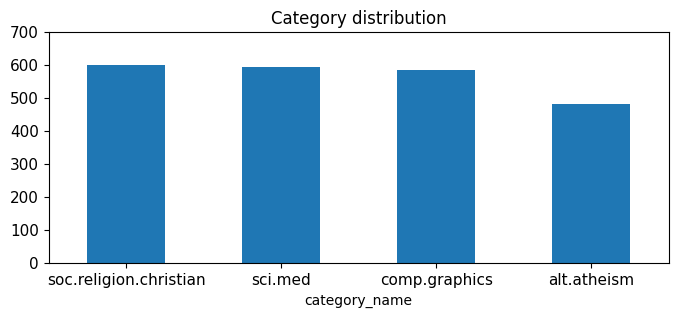

In [63]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
soc.religion.christian    271
sci.med                   255
comp.graphics             250
alt.atheism               224
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

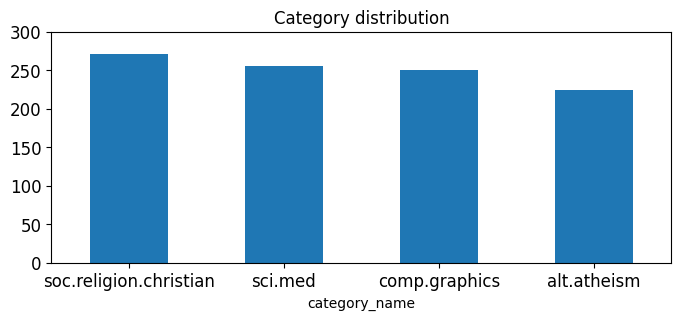

In [64]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

271
category_name
soc.religion.christian    271
sci.med                   255
comp.graphics             250
alt.atheism               224
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

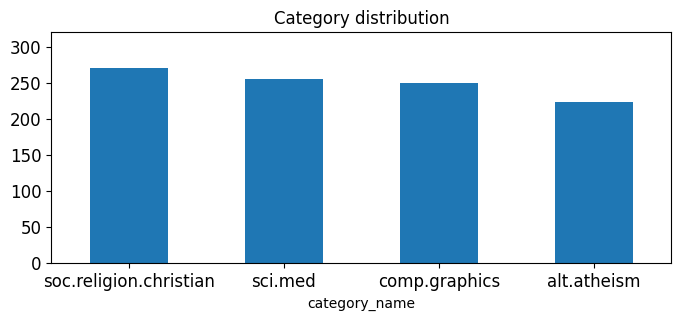

In [65]:
# Answer here
# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))




---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

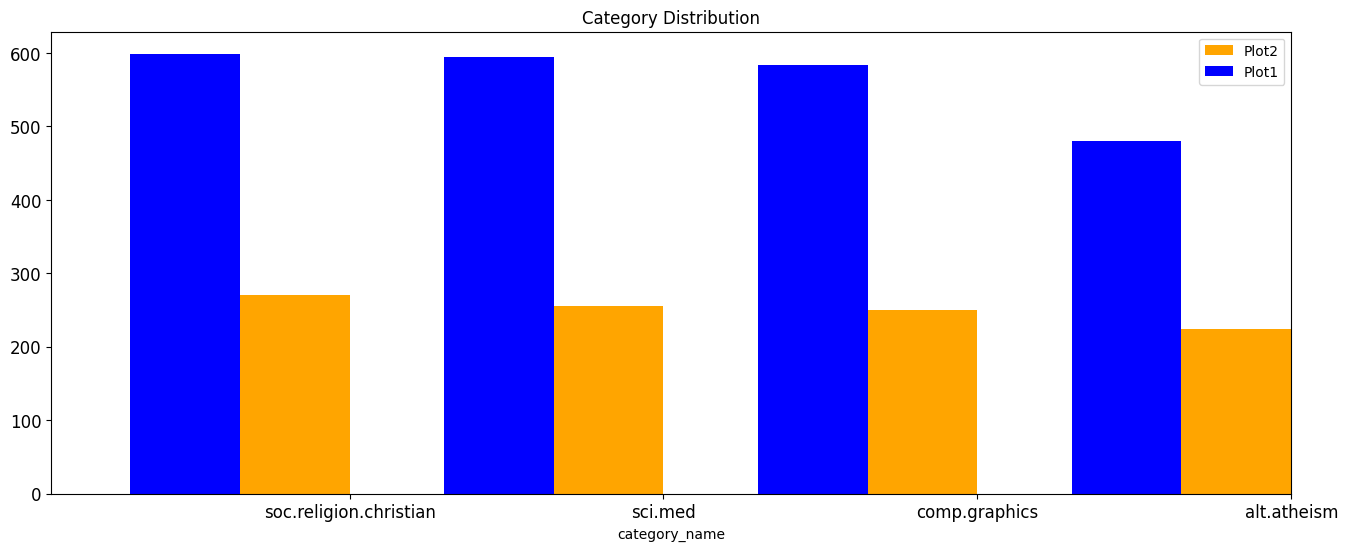

In [66]:
# Answer here
# Create a figure and a single set of axes
fig, ax = plt.subplots(figsize=(16, 6))

# Plotting on the single set of axes with different colors
X_sample.category_name.value_counts().plot(kind='bar', ax=ax, color='orange', label='Plot2', rot=0, fontsize=12, position=1, width = 0.35)

X.category_name.value_counts().plot(kind='bar', ax=ax, title='Category Distribution', color='blue', label='Plot1', rot=0, fontsize=12, position=2, width= 0.35)

# Set legend
ax.legend()

# Show the plot
plt.show()

In [67]:
import nltk

In [68]:
import nltk



[nltk_data] Downloading package punkt to /home/envy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [69]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [70]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [71]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [72]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [74]:
count_vect.get_feature_names_out()[14887]

'from'

In [75]:
count_vect.get_feature_names_out()[29022]

'sd345'

In [76]:
count_vect.get_feature_names_out()[8696]

'city'

In [77]:
count_vect.get_feature_names_out()[4017]

'ac'

In [78]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [79]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
# Create the analyzer using the count_vect built above
analyze = count_vect.build_analyzer()

# Analyze the first record (first document) in the X dataframe
first_record_tokens = analyze(X['text'].iloc[0])

# Print the tokenized text (unigrams) of the first document
print(first_record_tokens)


['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier', 'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii', 'nntp', 'posting', 'host', 'hampton', 'organization', 'the', 'city', 'university', 'lines', '14', 'does', 'anyone', 'know', 'of', 'good', 'way', 'standard', 'pc', 'application', 'pd', 'utility', 'to', 'convert', 'tif', 'img', 'tga', 'files', 'into', 'laserjet', 'iii', 'format', 'we', 'would', 'also', 'like', 'to', 'do', 'the', 'same', 'converting', 'to', 'hpgl', 'hp', 'plotter', 'files', 'please', 'email', 'any', 'response', 'is', 'this', 'the', 'correct', 'group', 'thanks', 'in', 'advance', 'michael', 'michael', 'collier', 'programmer', 'the', 'computer', 'unit', 'email', 'collier', 'uk', 'ac', 'city', 'the', 'city', 'university', 'tel', '071', '477', '8000', 'x3769', 'london', 'fax', '071', '477', '8565', 'ec1v', '0hb']


---

In [80]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [81]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [82]:
X_counts.shape

(2257, 35788)

In [83]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [84]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [85]:
# Answer here
row_index = 1  # Replace this with the desired row index


#Call a function to scan through the indices 
indices_of_1s = X_counts.getrow(row_index).indices

row_values = X_counts.getrow(row_index).toarray().flatten()

# Call for the second 1 in the indexed dataset. We assigned a variable for visual ease.
index_of_second_1 = indices_of_1s[1]

# To decode the word represented by the "1"
word_for_second_1 = count_vect.get_feature_names_out()[index_of_second_1]

#Use print function to print the word
print(word_for_second_1)

subject


---

In [86]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [87]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [88]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

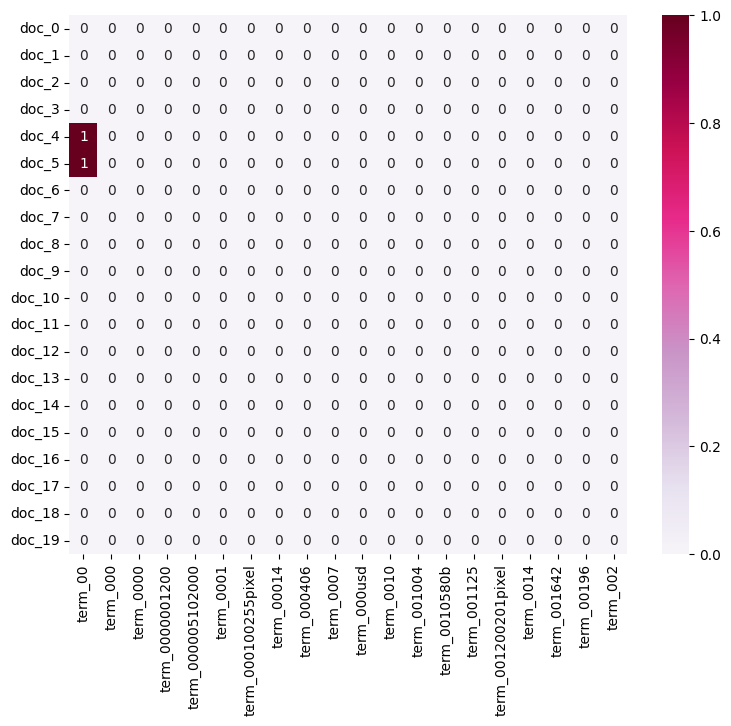

In [89]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [90]:
# Answer here
# RANDOM SAMPLING: The first thing that can be done to get more efficiency and more useful results is to extract random samples. Contd.
# so rather than using the first twenty terms, one can write a code and then word selects a term where the most activity. contd.
# takes place, or so to speak where most of the data is stored at the moment.

# DIMENTIONALITY(noise)REDUCTION techniques: One probably removes the number of categories, so that the data is easier to group. 

# below I have attempted to utilize the random sampling method. Every time the code is executed, different 
# results are shown. in some datasets there are no data stored hence we only get zeros. 
# given a sample size of 20. the sample size can be adjusted.

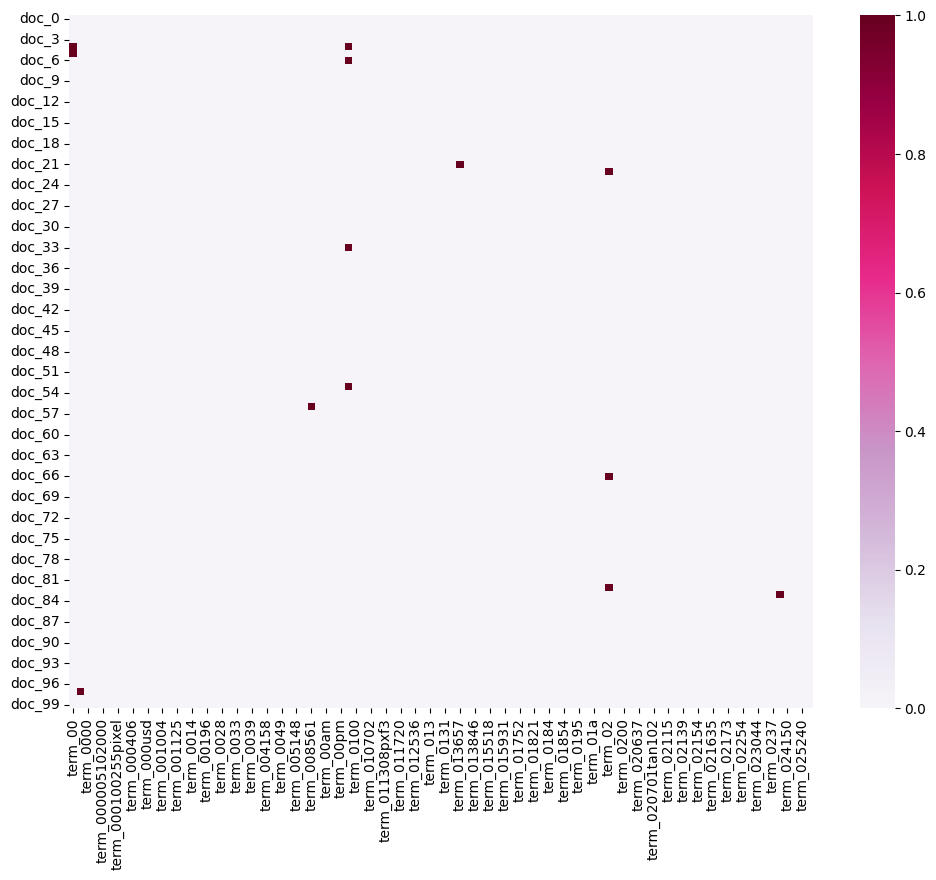

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Sampling 100 documents and 100 terms
num_docs = 100  # You can increase this number as needed
num_terms = 100  # You can increase this number as needed

# Sample the document-term matrix for plotting
plot_z_sample = X_counts[:num_docs, :num_terms].toarray()

# Create labels for the heatmap
plot_x_sample = ["term_" + str(i) for i in count_vect.get_feature_names_out()[:num_terms]]
plot_y_sample = ["doc_" + str(i) for i in list(X.index)[:num_docs]]

# Convert to a DataFrame
df_todraw_sample = pd.DataFrame(plot_z_sample, columns=plot_x_sample, index=plot_y_sample)

# Plot the heatmap
plt.subplots(figsize=(12, 9))  # Adjust size based on the number of rows and columns
ax = sns.heatmap(df_todraw_sample, cmap="PuRd", vmin=0, vmax=1, annot=False)
plt.show()


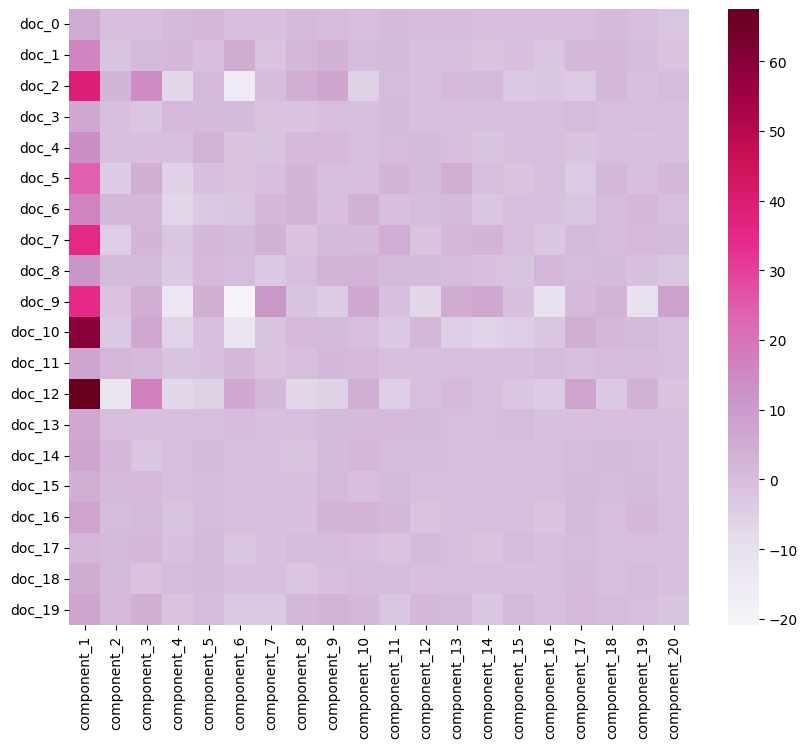

In [92]:
from sklearn.decomposition import TruncatedSVD

# Perform PCA to reduce dimensionality (e.g., reduce to 50 components)
svd = TruncatedSVD(n_components=50)
X_reduced = svd.fit_transform(X_counts)

# Use only the reduced components for heatmap
df_todraw_reduced = pd.DataFrame(X_reduced[:20, :20],  # Subset to 20 documents, 20 components
                                 index=plot_y, 
                                 columns=["component_" + str(i) for i in range(1, 21)])

# Plot the heatmap for reduced components
plt.subplots(figsize=(10, 8))
sns.heatmap(df_todraw_reduced, cmap="PuRd", annot=False)
plt.show()


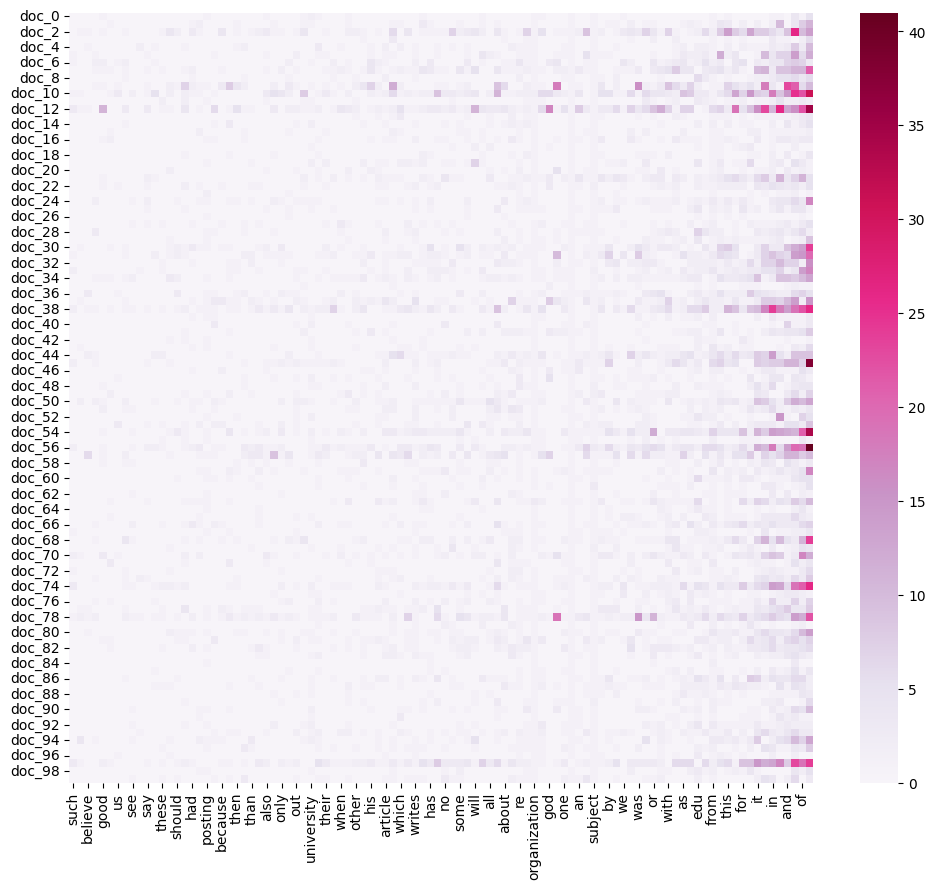

In [93]:
# Get the term frequencies (sum across documents)
term_frequencies = X_counts.sum(axis=0).A1  # Convert to flat array

# Select top N frequent terms
top_n_terms = 100  # Modify this as needed
most_frequent_term_indices = term_frequencies.argsort()[-top_n_terms:]  # Get indices of the most frequent terms

# Select corresponding rows and columns for plotting
plot_z_frequent = X_counts[:100, most_frequent_term_indices].toarray()

# Create labels for the heatmap
plot_x_frequent = [count_vect.get_feature_names_out()[i] for i in most_frequent_term_indices]
plot_y_frequent = ["doc_" + str(i) for i in list(X.index)[:100]]

# Convert to a DataFrame
df_todraw_frequent = pd.DataFrame(plot_z_frequent, columns=plot_x_frequent, index=plot_y_frequent)

# Plot the heatmap for frequent terms
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw_frequent, cmap="PuRd", annot=False)
plt.show()


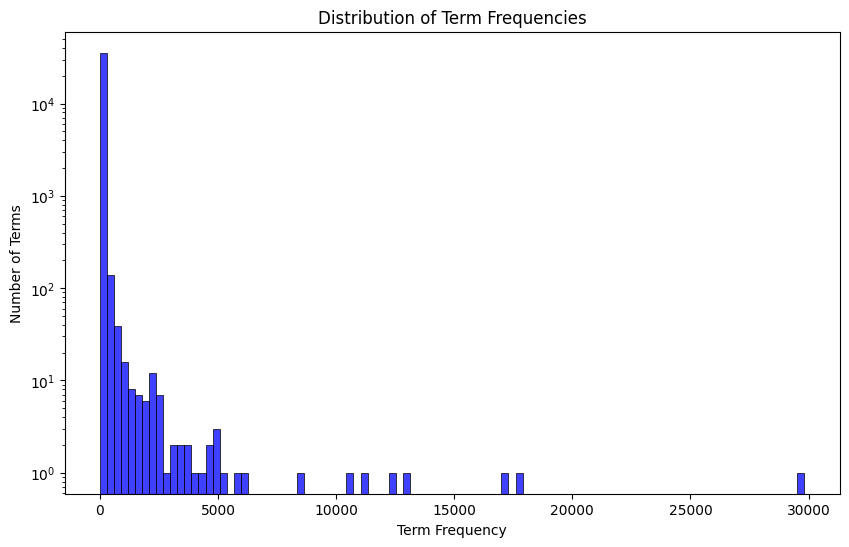

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# To plot the entire term-document matrix or a large sample, it's impractical to visualize all due to size.
# A more efficient approach would be to visualize a summary, such as the distribution of term frequencies.

# Calculate term frequencies across all documents
full_term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

# To make the visualization manageable, we could look at the distribution of these frequencies
plt.figure(figsize=(10, 6))
sns.histplot(full_term_frequencies, bins=100, kde=False, color='blue')
plt.yscale('log')  # Log scale to better visualize the distribution
plt.title('Distribution of Term Frequencies')
plt.xlabel('Term Frequency')
plt.ylabel('Number of Terms')
plt.show()

---

In [95]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [96]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [97]:
term_frequencies[0] #sum of first term: 00

134

/tmp/ipykernel_22967/3480579971.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


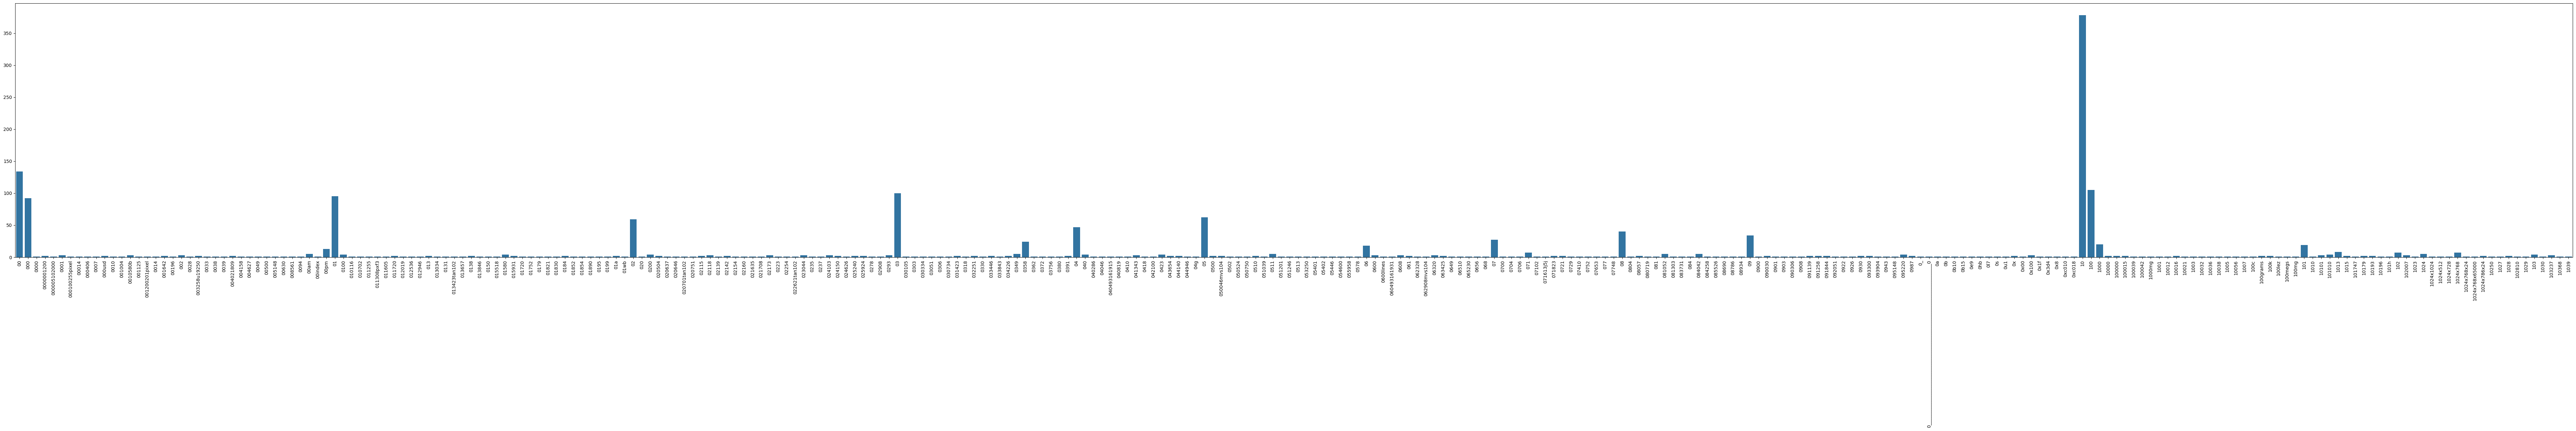

In [98]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

/tmp/ipykernel_22967/3158096002.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:90], rotation = 90);


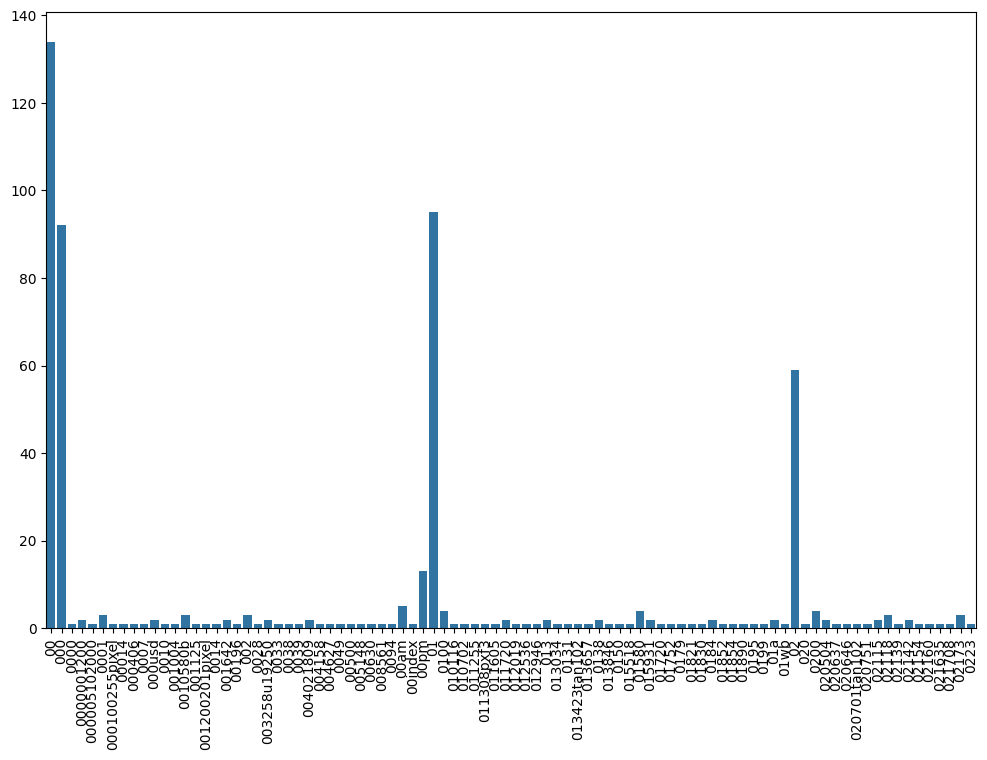

In [99]:
# Answer here
plt.subplots(figsize=(12, 8))
g = sns.barplot(x=count_vect.get_feature_names_out()[:90], 
            y=term_frequencies[:90])
g.set_xticklabels(count_vect.get_feature_names_out()[:90], rotation = 90);

---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [100]:
# Answer here

import plotly.express as px

# 50 terms and their frequencies
top_terms_df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:50],
    'Frequency': term_frequencies[:50]
})

# Create a bar graph using Plotly 
fig = px.bar(top_terms_df, x='Term', y='Frequency',
             title='Top 50 Term Frequencies',
             labels={'Frequency': 'Term Frequency', 'Term': 'Terms'},
             width=1000, height=500)

# Update layout for better x-axis label visibility
fig.update_layout(xaxis=dict(tickangle=45))

# Show the plot
fig.show()



---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

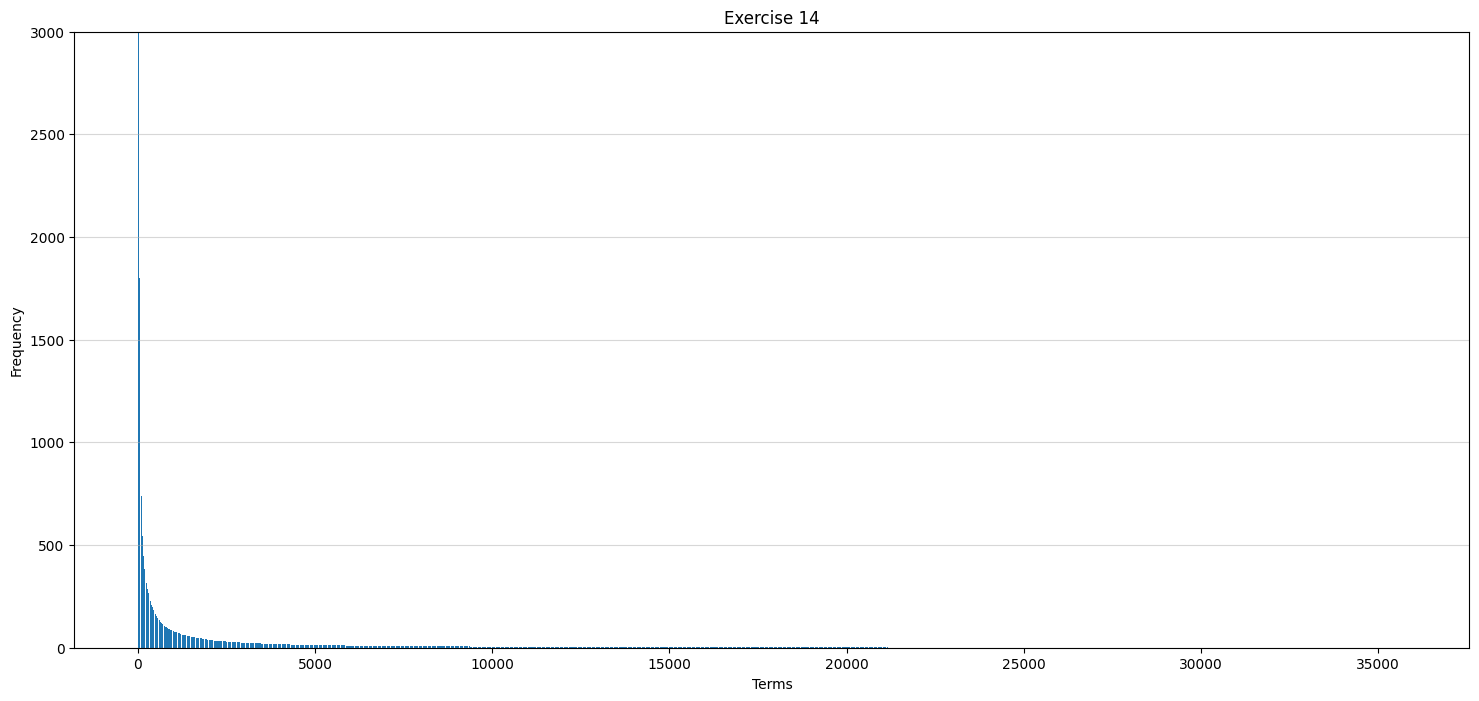

In [101]:
# Answer here

import matplotlib.pyplot as plt

term_frequencies = np.array(X_counts.sum(axis=0))[0]

# initiate long tail algorithim 
sorted_indices = term_frequencies.argsort()[::-1]
sorted_frequencies = term_frequencies[sorted_indices]

# Create a bar plot with sorted frequencies
plt.figure(figsize=(18, 8))
plt.bar(range(len(sorted_frequencies)), sorted_frequencies)
plt.title('Exercise 14')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.ylim(0, 3000)  
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.show()

---

In [102]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/tmp/ipykernel_22967/2166548998.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



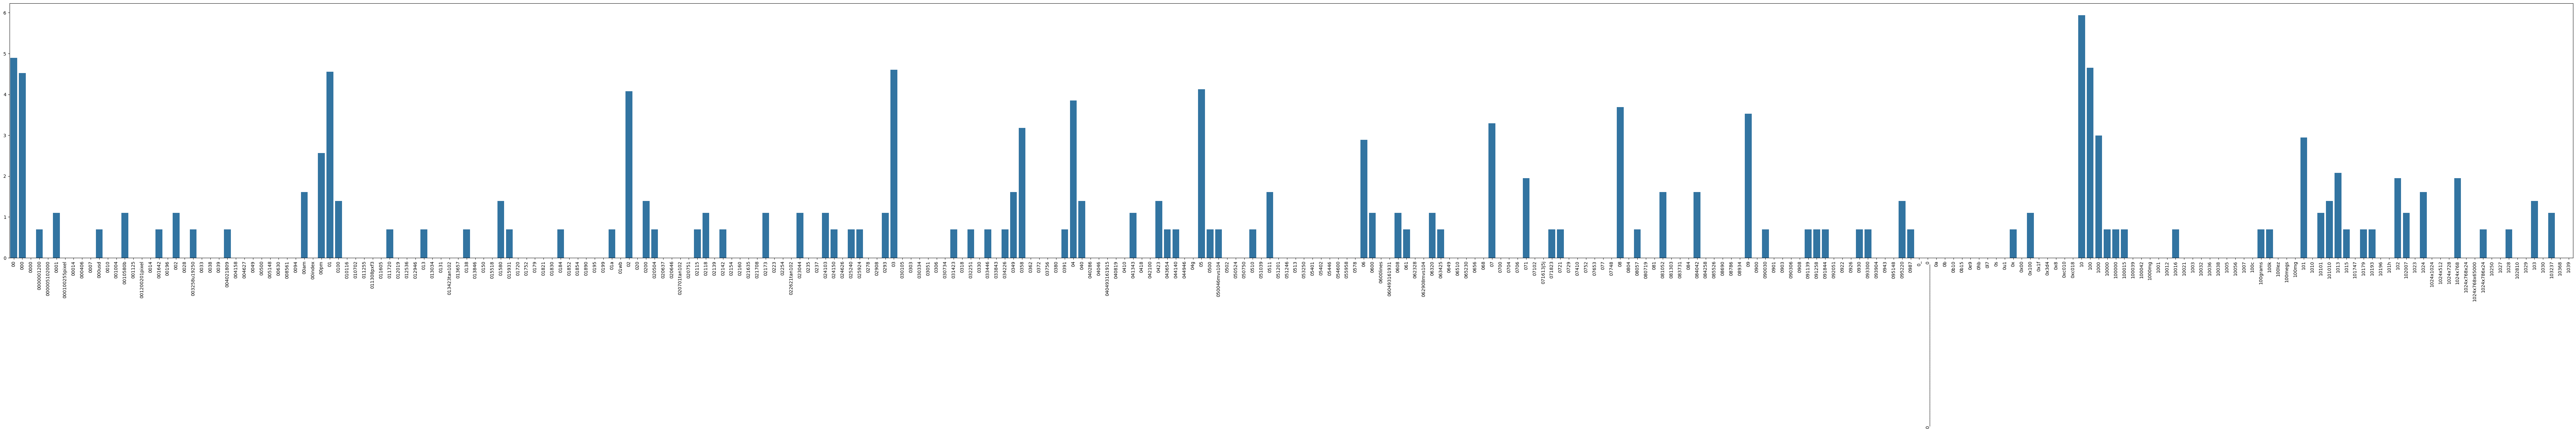

In [103]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

/tmp/ipykernel_22967/2817303458.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



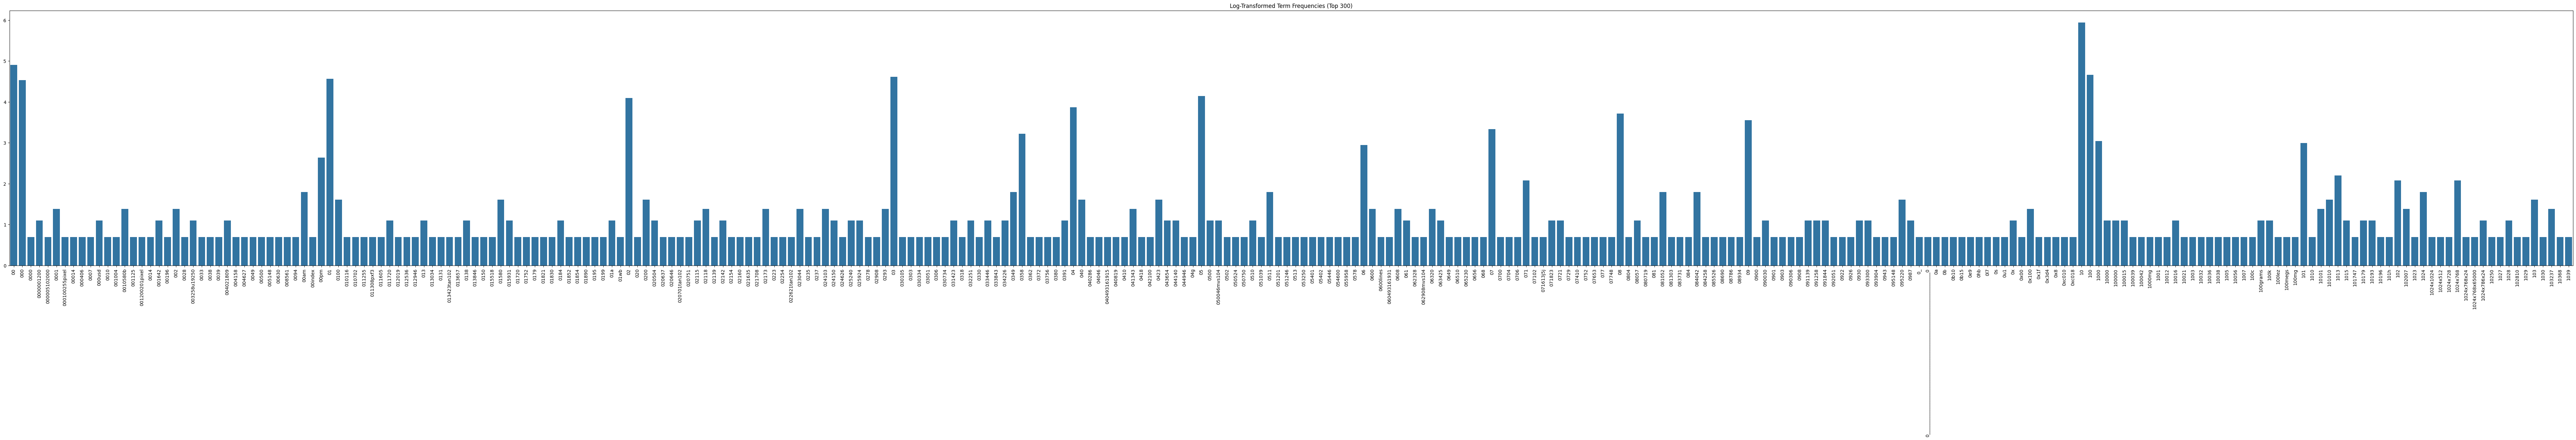

In [104]:
# Answer here
#When comparing the raw term frequencies to the log-transformed frequencies, the key difference lies in how the data is visualized and interpreted. 
# In the raw frequency chart, the most frequent terms dominate the plot, making it difficult to observe or compare terms with lower frequencies. 
# However, when applying a logarithmic transformation to the frequencies, the values are compressed, allowing lower-frequency terms to become more visible. 
# This transformation mitigates the skewness typically present in natural language data, where a few words appear very frequently, and many words are rare. 
# The log-transformed plot thus highlights both high- and low-frequency terms, enabling a more balanced and detailed comparison. 
# Furthermore, the log scale helps reveal patterns and insights in the long tail of the distribution, which may otherwise go unnoticed in a raw frequency plot. 
# This allows for a clearer understanding of the relative differences between terms across the entire vocabulary, providing a more nuanced view of the term distribution.
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Log-transform the term frequencies
term_frequencies_log = [math.log(i + 1) for i in term_frequencies]  # Adding 1 to avoid log(0)

# Plot the log-transformed term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)
plt.title('Log-Transformed Term Frequencies (Top 300)')
plt.show()



In [105]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [106]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category comp.graphics:


00  000  000005102000  000100255pixel  0007  000usd  0010580b  \
0     0    0             0               0     0       0         0   
1     0    0             0               0     0       0         0   
2     0    0             0               0     0       0         0   
3     0    0             0               0     0       0         0   
4     0    0             0               0     0       0         0   
..   ..  ...           ...             ...   ...     ...       ...   
579   0    0             0               0     0       0         0   
580   0    0             0               0     0       0         0   
581   0    0             0               0     0       0         0   
582   0    0             0               0     0       0         0   
583   0    0             0               0     0       0         0   

     001200201pixel  00196  002  ...  zorn  zrz  zsoft  zt  zug  zurich  zvi  \
0                 0      0    0  ...     0    0      0   0    0       0    0   
1                 0      0    0  ...     0    0      0   0    0       0    0   
2                 0      0    0  ...     0    0      0   0    0       0    0   
3                 0      0    0  ...     0    0      0   0    0       0    0   
4                 0      0    0  ...     0    0      0   0    0       0    0   
..              ...    ...  ...  ...   ...  ...    ...  ..  ...     ...  ...   
579               0      0    0  ...     0    0      0   0    0       0    0   
580               0      0    0  ...     0    0      0   0    0       0    0   
581               0      0    0  ...     0    0      0   0    0       0    0   
582               0      0    0  ...     0    0      0   0    0       0    0   
583               0      0    0  ...     0    0      0   0    0       0    0   

     zyeh  zyxel  ªl  
0       0      0   0  
1       0      0   0  
2       0      0   0  
3       0      0   0  
4       0      0   0  
..    ...    ...  ..  
579     0      0   0  
580     0      0   0  
581     0      0   0  
582     0      0   0  
583     0      0   0  

[584 rows x 13756 columns]

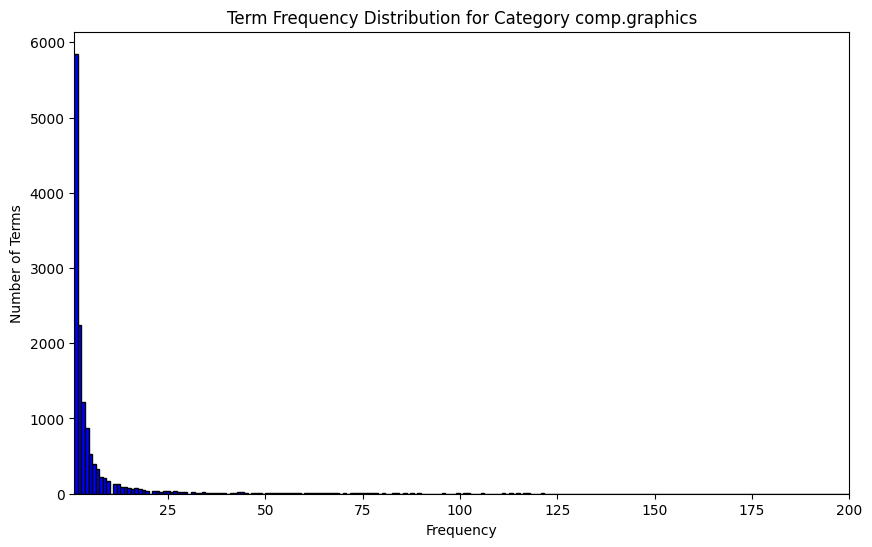

In [107]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [108]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comp.graphics
Number of terms in top 5%: 687
Filtered terms: ['the', 'to', 'of', 'and', 'is', 'in', 'for', 'it', 'from', 'you', 'edu', 'that', 'on', 'this', 'or', 'be', 'with', 'have', 'lines', 'can', 'subject', 'are', 'graphics', 'if', 'organization', 'image', 'as', 'not', 'but', 'at', 'there', 'com', 'an', 'any', 'will', 'by', 'university', 're', 'about', 'some', 'posting', 'file', 'do', 'all', 'would', 'host', 'jpeg', 'what', 'so', 'nntp', 'has', 'files', 'which', 'one', 'also', 'me', 'use', 'software', 'was', 'my', 'images', 'writes', 'other', 'article', 'out', 'data', 'program', 'know', 'like', 'version', 'more', 'color', 'ftp', 'your', 'get', 'computer', 'don', '3d', 'does', 'no', 'mail', 'format', 'they', 'available', 'need', 'we', 'ca', 'thanks', 'just', 'bit', 'gif', 'how', 'help', 'am', 'please', 'package', 'pub', 'anyone', 'very', 'information', 'using', 'code', 'line', 'than', 'find', 'system', 'only', 'time', 'where', '24', 'windows', 'good', 'uk', 'cs', 'display

In [109]:
sorted_counts #We can see the frequencies sorted in a descending order


array([4537, 2775, 2470, ...,    1,    1,    1])

In [110]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order


array([12266, 12390,  9021, ...,  7181,  7183,  6877])

In [111]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.


4537

In [112]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comp.graphics
Number of terms in bottom 1%: 137
Filtered terms: ['initworld', 'jkpg', 'jiu1', 'jiu', 'jfreund', 'jeremy', 'jena', 'jem', 'jele', 'jeffrey', 'jbalgley', 'jasper', 'jancene', 'jaguar', 'jaggies', 'jagged', 'jaclyn', 'jacky', 'ja', 'ixos', 'ixels', 'ix', 'ivr', 'ivnorm', 'iv2scn', 'itri', 'itor', 'itnsg1', 'jman', 'itn', 'jna', 'joes', 'jump', 'juelin', 'judge', 'juan', 'jroberts', 'jr', 'jpsrc4', 'jplpost', 'jpgs', 'jpg95', 'jpg75', 'jpg5o', 'jpg50', 'jpg25', 'jpegv4', 'jpegsrc4', 'jpeged', 'jpeg4bin', 'jpeg4386', 'journalix', 'josephson', 'jong', 'joint', 'join', 'johnm', 'johnl', 'jogle', 'jobs', 'jun', 'ithil', 'iterate', 'ipsc2', 'ipcs', 'ipa', 'ious', 'ior', 'ions', 'iol', 'io', 'invited', 'invisible', 'investment', 'investigator', 'investigation', 'investigating', 'inversion', 'inventing', 'invent', 'invariants', 'invariably', 'inumerable', 'intuitive', 'introducing', 'intricacies', 'intervention', 'interval', 'interpretor', 'interpretations', 'ipu', 'iter

In [113]:
sorted_counts #We can see the frequencies sorted in an ascending order


array([   1,    1,    1, ..., 2470, 2775, 4537])

In [114]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order


array([ 6877,  7183,  7181, ...,  9021, 12390, 12266])

In [115]:
filt_term_document_dfs[categories[category_number]].loc[:,'l14h11'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.


1

In [116]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category comp.graphics we filter the following words:
Bottom 1.0% words: 
initworld    1
jkpg         1
jiu1         1
jiu          1
jfreund      1
            ..
lab2         1
laaksone     1
l4v          1
l300         1
l14h11       1
Length: 137, dtype: int64
Top 5.0% words: 
40               27
distributed      27
open             27
multi            27
getting          27
               ... 
is             1751
and            2382
of             2470
to             2775
the            4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
disparate       1
expose          1
explosive       1
resisting       1
exploitation    1
               ..
fence           1
feminist        1
remarriage      1
remarried       1
remeber         1
Length: 138, dtype: int64
Top 5.0% words: 
pagan        36
claims       36
gave         36
parts        36
jr           37
          ...  
that       4393
and        4409
to        

000  000005102000  000100255pixel  0007  000usd  0010580b  \
0      0             0               0     0       0         0   
1      0             0               0     0       0         0   
2      0             0               0     0       0         0   
3      0             0               0     0       0         0   
4      0             0               0     0       0         0   
..   ...           ...             ...   ...     ...       ...   
579    0             0               0     0       0         0   
580    0             0               0     0       0         0   
581    0             0               0     0       0         0   
582    0             0               0     0       0         0   
583    0             0               0     0       0         0   

     001200201pixel  00196  002  0028  ...  zorn  zrz  zsoft  zt  zug  zurich  \
0                 0      0    0     0  ...     0    0      0   0    0       0   
1                 0      0    0     0  ...     0    0      0   0    0       0   
2                 0      0    0     0  ...     0    0      0   0    0       0   
3                 0      0    0     0  ...     0    0      0   0    0       0   
4                 0      0    0     0  ...     0    0      0   0    0       0   
..              ...    ...  ...   ...  ...   ...  ...    ...  ..  ...     ...   
579               0      0    0     0  ...     0    0      0   0    0       0   
580               0      0    0     0  ...     0    0      0   0    0       0   
581               0      0    0     0  ...     0    0      0   0    0       0   
582               0      0    0     0  ...     0    0      0   0    0       0   
583               0      0    0     0  ...     0    0      0   0    0       0   

     zvi  zyeh  zyxel  ªl  
0      0     0      0   0  
1      0     0      0   0  
2      0     0      0   0  
3      0     0      0   0  
4      0     0      0   0  
..   ...   ...    ...  ..  
579    0     0      0   0  
580    0     0      0   0  
581    0     0      0   0  
582    0     0      0   0  
583    0     0      0   0  

[584 rows x 12932 columns]

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [118]:
#Answer
# Modified function to pass filt_term_document_dfs as an argument
def review_filtered_words(term_document_dfs, filtered_term_document_dfs, categories):
    filtered_words_dict = {}

    for category in categories:
        print(f"Reviewing filtered words for category: {category}")
        
        # Get the filtered words for the current category
        filtered_df = term_document_dfs[category]
        
        # Get the removed words
        original_words = filtered_term_document_dfs[category].columns
        filtered_words = filtered_df.columns
        removed_words = set(original_words) - set(filtered_words)
        
        # Store removed words in a dictionary for review
        filtered_words_dict[category] = list(removed_words)
        
        # Display the removed words for this category
        print(f"Filtered words for category {category}: {removed_words}")
        print("-" * 80)
    
    return filtered_words_dict

# Call the function and pass filt_term_document_dfs
filtered_words_review = review_filtered_words(term_document_dfs, filt_term_document_dfs, categories)


Reviewing filtered words for category: comp.graphics
Filtered words for category comp.graphics: {'ed', 'name', 'subject', 'free', 'jpeg', 'interpretor', 'jfreund', 'an', 'to', 'state', 'me', 'shareware', 'jkpg', 'true', 'wrote', 'list', 'off', 'every', 'section', 'know', 'type', 'send', 'apple', 'doing', 'is', 'inumerable', 'nfotis', 'handle', 'large', 'make', 'file', 'done', 'hope', 'newsreader', 'msdos', 'jpg5o', 'animation', 'gl', 'same', 'like', 'database', 'distribution', 'quite', 'object', '00', 'disk', 'things', '25', 'imagine', 'cis', 'irritated', '12', 'details', 'runs', 'little', 'technical', 'cc', 'navy', 'jasper', 'rpi', 'bit', 'each', 'hp', 'macintosh', 'since', 'end', 'per', 'systems', 'archie', 'based', 'contact', 'after', 'bits', 'way', '23', 'understand', 'ms', 'which', 'split', 'when', 'public', 'map', 'se', 'files', 'features', 'reply', 'though', 'engineering', '15', 'pc', 'video', 'pictures', 'polygon', 'run', 'row', 'mail', 'iron', 'will', 'users', 'jaclyn', 'compu

In [ ]:
#Answer
#we filtered the top 5% most frequent and bottom 1% least frequent terms across different categories. Common stopwords like "the", "is", and "and" were filtered out in every category due to their high frequency. 
# Category-specific terms like "image" in "comp.graphics" or "doctor" in "sci.med" were also filtered due to their domain relevance but frequent occurrence.

#In contrast, rare terms (bottom 1%) were more diverse and specific, such as technical acronyms in "comp.graphics" or rare medical terms in "sci.med". 
# This filtering highlights each category's unique vocabulary while removing redundant noise from the most and least frequent terms.

In [119]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.52064505570053
Variance in Transaction Sizes : 23302.448621325693
Sparsity : 0.995637745806304


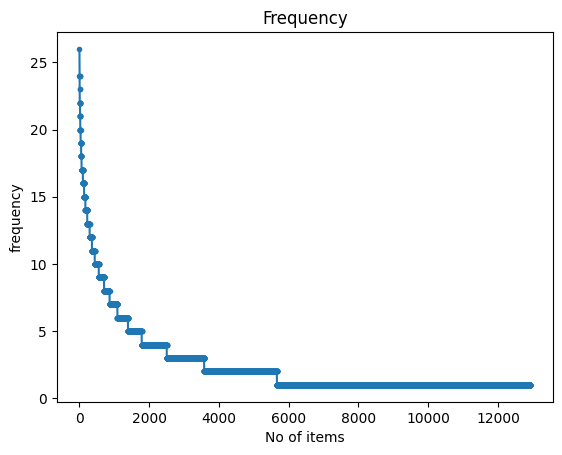

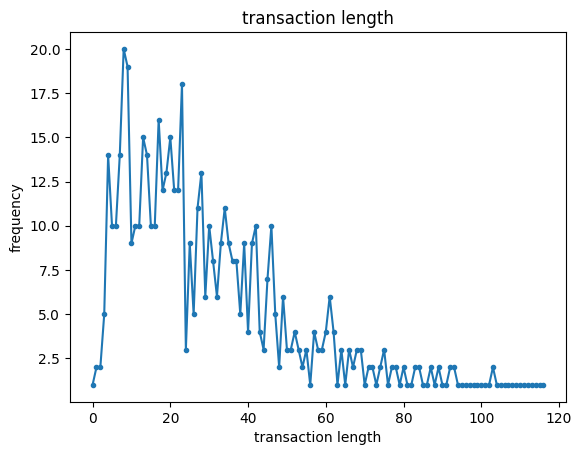

In [120]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 594
Number of items : 15283
Minimum Transaction Size : 9
Average Transaction Size : 74.55892255892256
Maximum Transaction Size : 1070
Standard Deviation Transaction Size : 115.43440452043433
Variance in Transaction Sizes : 13347.572407606136
Sparsity : 0.9951214471923757


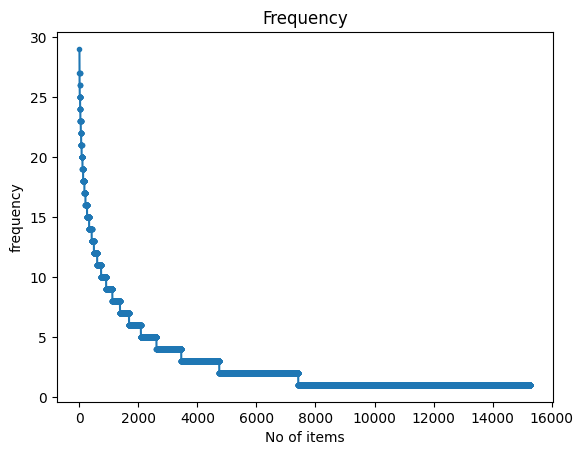

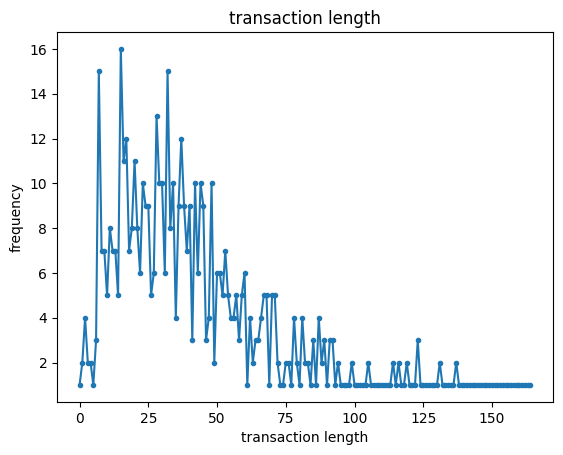

In [121]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_sci_med.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 599
Number of items : 13041
Minimum Transaction Size : 2
Average Transaction Size : 77.04507512520868
Maximum Transaction Size : 460
Standard Deviation Transaction Size : 62.384260554199
Variance in Transaction Sizes : 3898.3039849023735
Sparsity : 0.9940920884038641


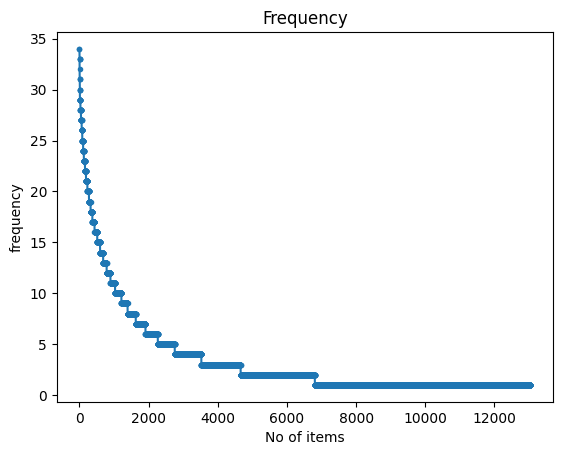

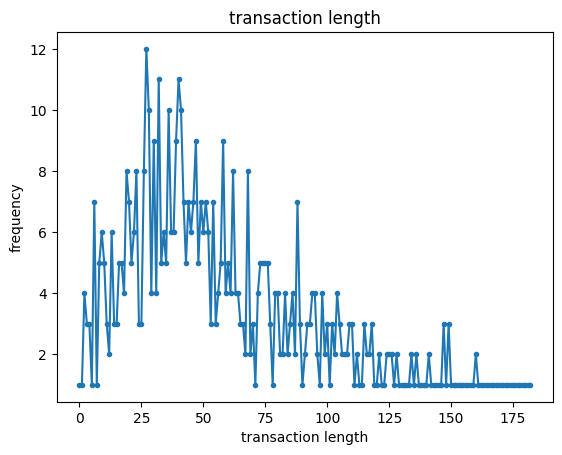

In [122]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_soc_religion_christian.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162144
Sparsity : 0.9932801851851852


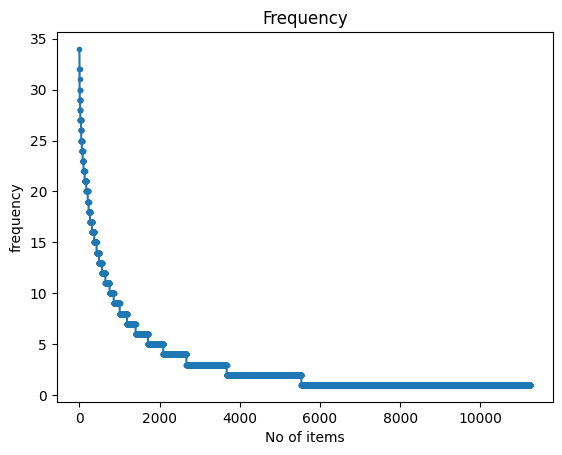

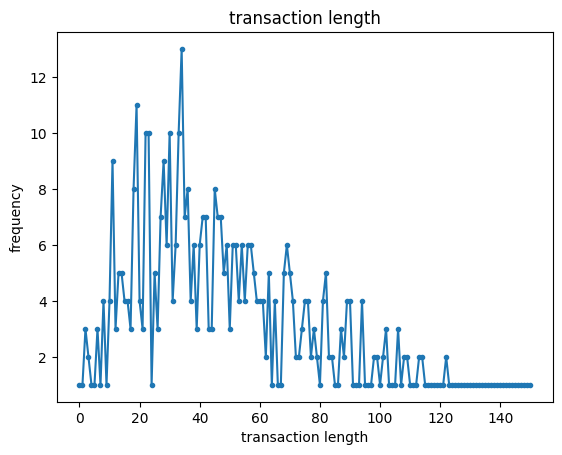

In [123]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_alt_atheism.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [124]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.3472452163696289


In [125]:
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

Patterns  Support
0          leave        9
1          swell        9
2          color        9
3       confused        9
4       learning        9
...          ...      ...
9995       means       27
9996       haven       27
9997      happen       27
9998  originator       27
9999        came       29

[10000 rows x 2 columns]

In [126]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.35724616050720215


In [127]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

Patterns  Support
0            choices        9
1               corp        9
2           hausmann        9
3     hausmann maddi        9
4               kids        9
...              ...      ...
4671            date       31
4672        date gmt       19
4673            stay       32
4674         snm6394       32
4675             gmt       34

[4676 rows x 2 columns]

In [128]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.2423996925354004


In [129]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0      individual        9
1         certain        9
2            hall        9
3            mike        9
4              vr        9
...           ...      ...
33569        life       24
33570       ideas       24
33571        feel       24
33572       tried       24
33573       maybe       26

[33574 rows x 2 columns]

In [130]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.4534573554992676


In [131]:
obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns
frequentPatternsDF_soc_religion_christian

Patterns  Support
0         latest        9
1            san        9
2          seven        9
3        schools        9
4          chose        9
...          ...      ...
11208         34       33
11209  institute       33
11210       ways       33
11211         oh       34
11212       send       34

[11213 rows x 2 columns]

In [132]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [133]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
0          0     0  ...                                   0   
1          0     0  ...                                   0   
2          0     0  ...                                   0   
3          0     0  ...                                   0   
4          0     0  ...                                   0   
...      ...   ...  ...                                 ...   
2252       0     0  ...                                   0   
2253       0     0  ...                                   0   
2254       0     0  ...                                   0   
2255       0     0  ...                                   0   
2256       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   
...                                ...                     ...   
2252                                 0                       0   
2253                                 0                       0   
2254                                 0                       0   
2255                                 0                       0   
2256                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
2252                                0                                0   
2253                                0                                0   
2254                                0                                0   
2255                                0                                0   
2256                                0                                0   

      axes funds motss matching  boy funds motss matching  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
2252                          0                         0   
2253                          0                         0   
2254                          0                         0   
2255                

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [134]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# Function to simulate FAE Top-K by selecting the top k patterns based on support
def simulate_fae_top_k(category, k, minSup=5):
    print(f"Simulating FAE Top-K for {category} with k={k}")
    
    # Run FPGrowth with a minimum support to get all patterns
    obj_fp = alg.FPGrowth(iFile=f'td_freq_db_{category}.csv', minSup=minSup)
    obj_fp.mine()
    
    # Get all the patterns as a DataFrame
    all_patterns = obj_fp.getPatternsAsDataFrame()
    
    # Sort patterns by support in descending order and select the top k
    top_k_patterns = all_patterns.sort_values(by='Support', ascending=False).head(k)
    
    # Print the top k patterns and save them to a file
    print(f"Top-{k} Patterns for {category}:")
    print(top_k_patterns)
    obj_fp.save(f'fae_top{k}_patterns_{category}.txt')
    
    return top_k_patterns

# Running the simulation for the 'comp.graphics' category with k = 500, 1000, 1500
category = 'comp_graphics'
k_values = [500, 1000, 1500]
for k in k_values:
    simulate_fae_top_k(category, k)


Simulating FAE Top-K for comp_graphics with k=500
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Top-500 Patterns for comp_graphics:
                                                  Patterns  Support
2593530                                              maybe       26
2593529                                              tried       24
2593528                                               feel       24
2593527                                              ideas       24
2593526                                               life       24
...                                                    ...      ...
2576747                     forum curious wate convenience       12
2576746                  forum concerning wate convenience       12
2576742             personally discussing wate convenience       12
2576743                  personally awful wate convenience       12
2576692  feel learn proposed concerning curious favor p...       12

[500 rows x 2

In [167]:
import time
from PAMI.frequentPattern.basic import FPGrowth as alg

# Function to simulate FAE Top-K by selecting the top k patterns based on support
def simulate_fae_top_k(category, k, minSup=5):
    print(f"Simulating FAE Top-K for {category} with k={k}")
    
    start_time = time.time()  # Start the timer
    
    # Run FPGrowth with a minimum support to get all patterns
    obj_fp = alg.FPGrowth(iFile=f'td_freq_db_{category}.csv', minSup=minSup)
    obj_fp.mine()
    
    # Get all the patterns as a DataFrame
    all_patterns = obj_fp.getPatternsAsDataFrame()
    
    # Sort patterns by support in descending order and select the top k
    top_k_patterns = all_patterns.sort_values(by='Support', ascending=False).head(k)
    
    end_time = time.time()  # End the timer
    runtime = end_time - start_time  # Calculate runtime
    
    print(f"Top-{k} Patterns for {category}:")
    print(top_k_patterns)
    print(f"Runtime for FAE Top-K with k={k}: {runtime:.2f} seconds")
    
    obj_fp.save(f'fae_top{k}_patterns_{category}.txt')
    
    return top_k_patterns, runtime

# Running the simulation for the 'comp.graphics' category with k = 500, 1000, 1500
category = 'comp_graphics'
k_values = [500, 1000, 1500]
for k in k_values:
    simulate_fae_top_k(category, k)


Simulating FAE Top-K for comp_graphics with k=500
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Top-500 Patterns for comp_graphics:
                                                  Patterns  Support
2593530                                              maybe       26
2593529                                              tried       24
2593528                                               feel       24
2593527                                              ideas       24
2593526                                               life       24
...                                                    ...      ...
2576747                     forum curious wate convenience       12
2576746                  forum concerning wate convenience       12
2576742             personally discussing wate convenience       12
2576743                  personally awful wate convenience       12
2576692  feel learn proposed concerning curious favor p...       12

[500 rows x 2

In [135]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# Function to simulate MaxFPGrowth by running FPGrowth with different minSup values
def simulate_maxfp(category, minSup):
    print(f"Simulating MaxFPGrowth for {category} with minSup={minSup}")
    
    # Run FPGrowth with the specified minSup
    obj_fp = alg.FPGrowth(iFile=f'td_freq_db_{category}.csv', minSup=minSup)
    obj_fp.mine()
    
    # Get the patterns as a DataFrame and print them
    patterns = obj_fp.getPatternsAsDataFrame()
    print(f"MaxFPGrowth Patterns for {category} with minSup={minSup}:")
    print(patterns)
    
    # Save the patterns to a file
    obj_fp.save(f'maxfp_patterns_{category}_minSup{minSup}.txt')
    
    return patterns

# Running MaxFPGrowth for the 'comp.graphics' category with minSup = 3, 6, 9
category = 'comp_graphics'
minSup_values = [6, 9, 12]
for minSup in minSup_values:
    simulate_maxfp(category, minSup)


Simulating MaxFPGrowth for comp_graphics with minSup=6
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
MaxFPGrowth Patterns for comp_graphics with minSup=6:
         Patterns  Support
0            cool        6
1            loop        6
2           patch        6
3            stay        6
4       intensity        6
...           ...      ...
564656       life       24
564657      ideas       24
564658       feel       24
564659      tried       24
564660      maybe       26

[564661 rows x 2 columns]
Simulating MaxFPGrowth for comp_graphics with minSup=9
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
MaxFPGrowth Patterns for comp_graphics with minSup=9:
         Patterns  Support
0      individual        9
1         certain        9
2            hall        9
3            mike        9
4              vr        9
...           ...      ...
33569        life       24
33570       ideas       24
33571        feel   

In [ ]:
import time
from PAMI.frequentPattern.basic import FPGrowth as alg

# Function to simulate MaxFPGrowth by running FPGrowth with different minSup values
def simulate_maxfp(category, minSup):
    print(f"Simulating MaxFPGrowth for {category} with minSup={minSup}")
    
    start_time = time.time()  # Start the timer
    
    # Run FPGrowth with the specified minSup
    obj_fp = alg.FPGrowth(iFile=f'td_freq_db_{category}.csv', minSup=minSup)
    obj_fp.mine()
    
    # Get the patterns as a DataFrame and print them
    patterns = obj_fp.getPatternsAsDataFrame()
    
    end_time = time.time()  # End the timer
    runtime = end_time - start_time  # Calculate runtime
    
    print(f"MaxFPGrowth Patterns for {category} with minSup={minSup}:")
    print(patterns)
    print(f"Runtime for MaxFPGrowth with minSup={minSup}: {runtime:.2f} seconds")
    
    obj_fp.save(f'maxfp_patterns_{category}_minSup{minSup}.txt')
    
    return patterns, runtime

# Running MaxFPGrowth for the 'comp.graphics' category with minSup = 3, 6, 9
category = 'comp_graphics'
minSup_values = [3, 6, 9]
for minSup in minSup_values:
    simulate_maxfp(category, minSup)


In [168]:
#Answer
#The FAE Top-K algorithm is best for scenarios where a specific number of the most frequent patterns is needed, making it useful for quickly identifying dominant trends. 
# However, its focus on high-support patterns means it may overlook infrequent but important patterns.
# The MaxFPGrowth method is more versatile, allowing for a deeper exploration of the dataset through various minSup thresholds, making it suitable for uncovering rare but meaningful patterns. 
# In terms of performance, FAE Top-K can be slower due to its two-step process, while MaxFPGrowth benefits from optimizations that make it faster for a given threshold. 
# The original FPGrowth method remains a reliable option for straightforward pattern mining, balancing between speed and discovery of moderately frequent patterns.
# Comparing these methods provides insights into choosing the right algorithm based on the nature of the data and the analysis objectives.

#By documenting the runtime for each k and minSup, and analyzing the differences in the output patterns, you can gain a clearer understanding of which method is most appropriate for different analysis goals.

In [136]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# Run FPGrowth with a minimum support value to extract frequent patterns
minSup = 5  # Set a minimum support value
obj_fp = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)

# Mine the frequent patterns
obj_fp.mine()

# Get the patterns as a DataFrame and display them
frequent_patterns_df = obj_fp.getPatternsAsDataFrame()
print(frequent_patterns_df)

# Display the total number of patterns
print(f"Total number of patterns with minSup={minSup}: {len(frequent_patterns_df)}")

# Save the frequent patterns to a file
obj_fp.save(f'freq_patterns_comp_graphics_minSup{minSup}.txt')


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
           Patterns  Support
0        converting        5
1            divine        5
2              mesh        5
3         mesh body        5
4           smaller        5
...             ...      ...
2593526        life       24
2593527       ideas       24
2593528        feel       24
2593529       tried       24
2593530       maybe       26

[2593531 rows x 2 columns]
Total number of patterns with minSup=5: 2593531


In [137]:
import pandas as pd

# Load and inspect the CSV file
file_path = 'td_freq_db_comp_graphics.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the DataFrame to inspect
print(df.head())


  071\t0hb\t477\t8000\t8565\tcity\tcollier\tconverting\tcorrect\tec1v\thampton\thpgl\tiii\timg\tlaserjet\tlondon\tpd\tplotter\tresponse\tsd345\ttga\ttif\tunit\tutility\tx3769
0  28\talgo\talong\tani\taniruddha\tarea\tbackgro...                                                                                                                          
1  05\tamjad\tappear\tbrightness\tccs\tcertain\tc...                                                                                                                          
2  115a\t1170\t205\t2213\t35294\t5473\t60hz\t64\t...                                                                                                                          
3  although\tbc\tbritish\tchic\tclothes\tclothing...                                                                                                                          
4  24x\tcormack\td91\tdifference\tet\tgskolan\the...                                                                         

In [138]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# Run FPGrowth with a minimum support value to extract frequent patterns
minSup = 9  # Set a minimum support value
obj_fp = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)

# Mine the frequent patterns
obj_fp.mine()

# Get the patterns as a DataFrame and display them
frequent_patterns_df = obj_fp.getPatternsAsDataFrame()
print(frequent_patterns_df)

# Display the total number of patterns
print(f"Total number of patterns with minSup={minSup}: {len(frequent_patterns_df)}")

# Save the frequent patterns to a file
obj_fp.save(f'freq_patterns_comp_graphics_minSup{minSup}.txt')


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
         Patterns  Support
0      individual        9
1         certain        9
2            hall        9
3            mike        9
4              vr        9
...           ...      ...
33569        life       24
33570       ideas       24
33571        feel       24
33572       tried       24
33573       maybe       26

[33574 rows x 2 columns]
Total number of patterns with minSup=9: 33574


---

In [139]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [140]:
pip install umap-learn


Note: you may need to restart the kernel to use updated packages.


In [141]:
X_pca_tdm.shape

(2257, 2)

In [142]:
X_tsne_tdm.shape

(2257, 2)

In [143]:
X_umap_tdm.shape

(2257, 2)

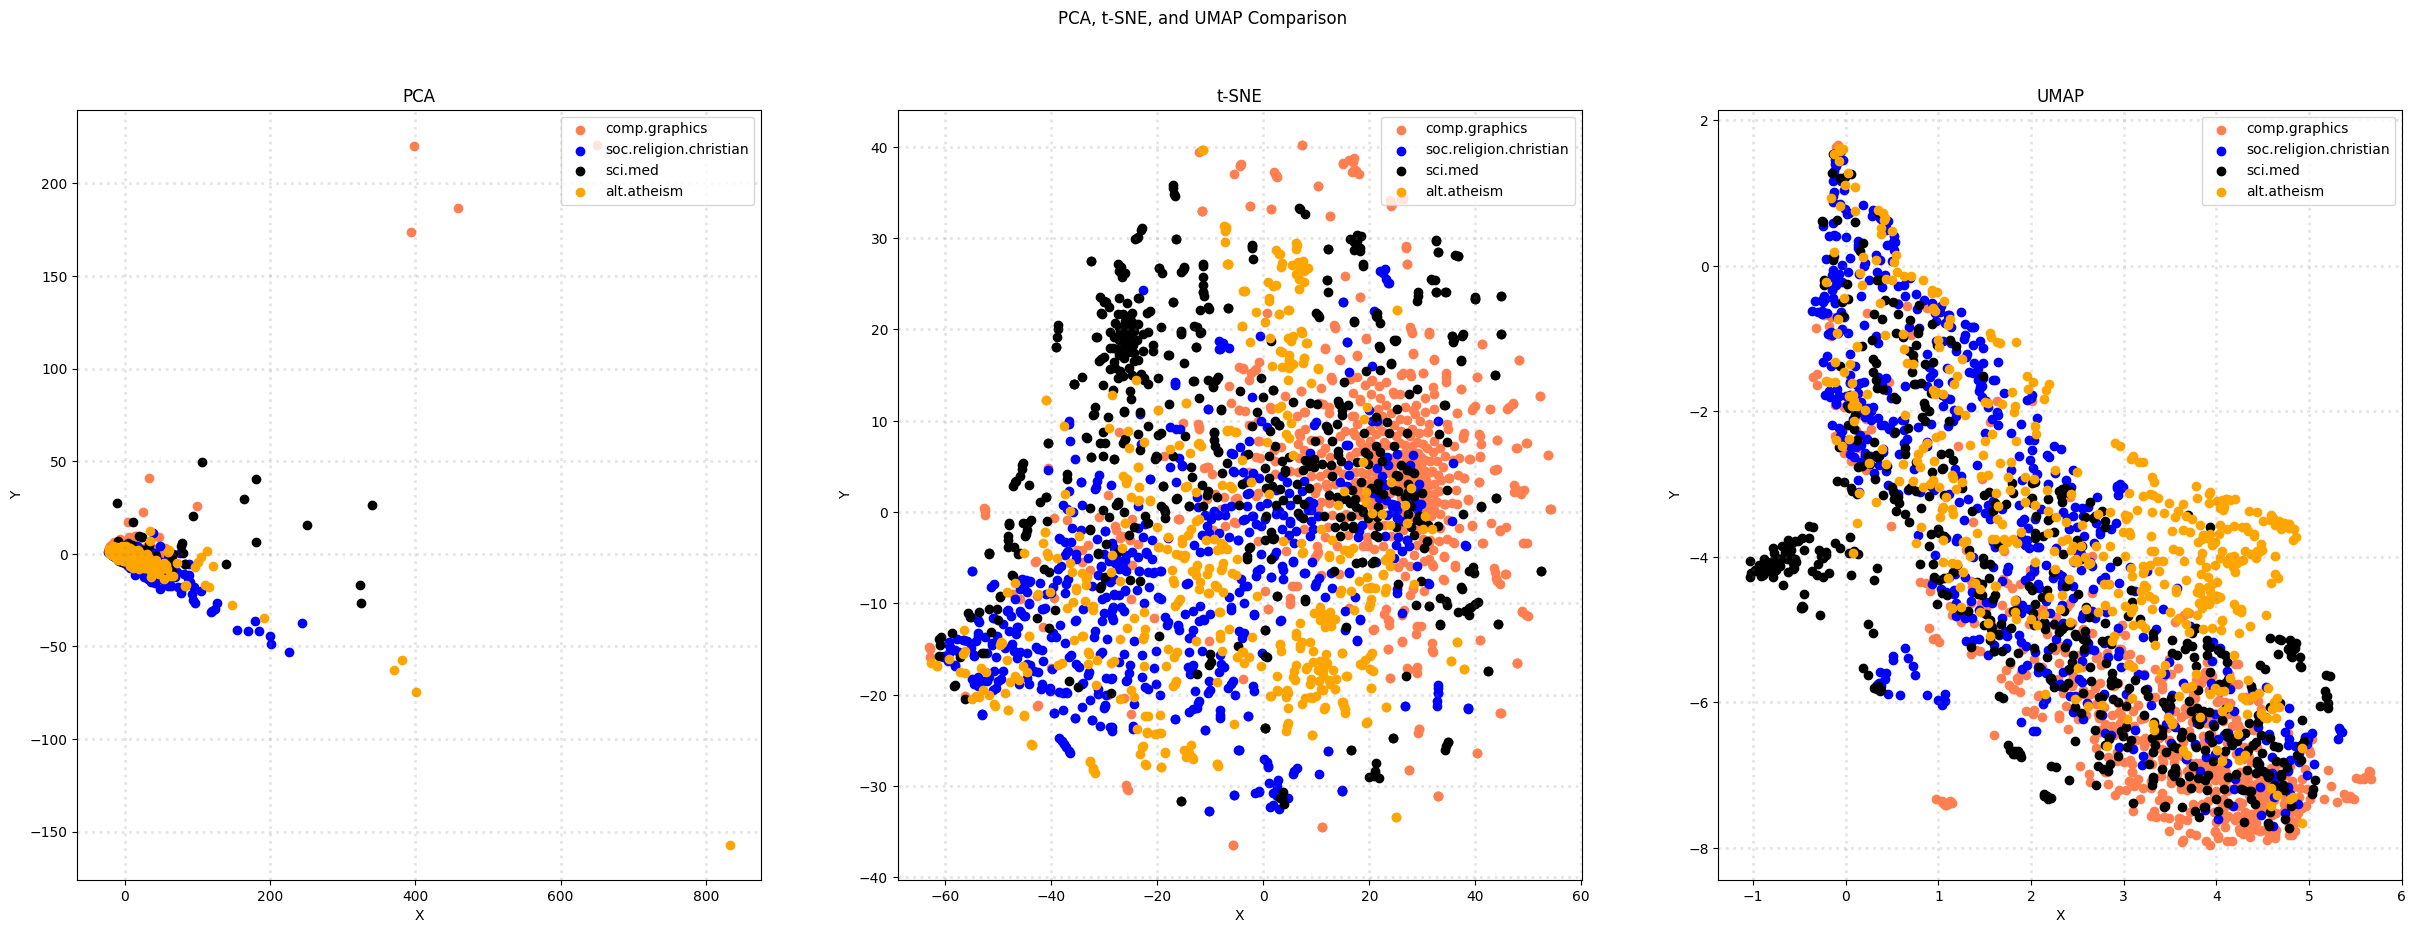

In [144]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

Now let's try in tandem with our pattern augmented data:

In [145]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

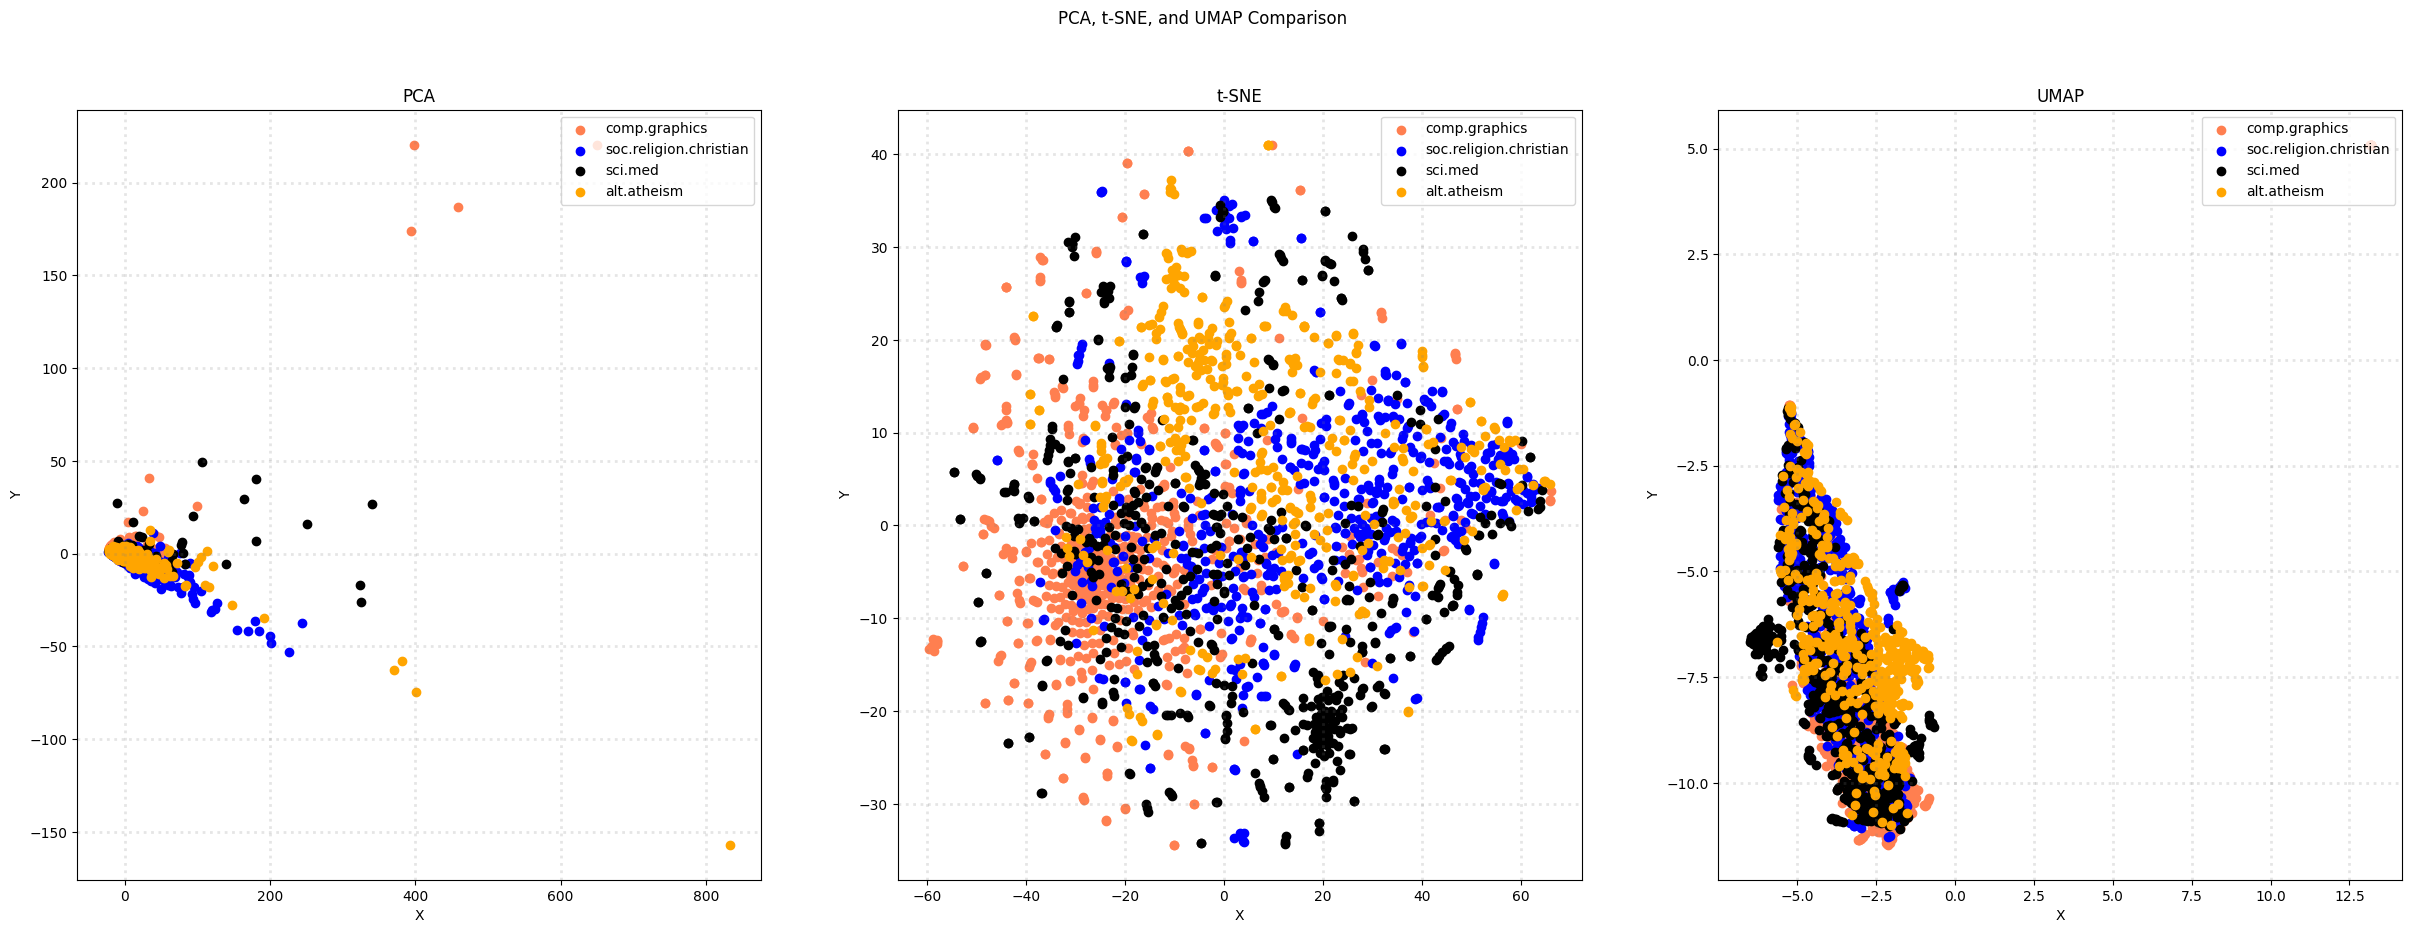

In [146]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

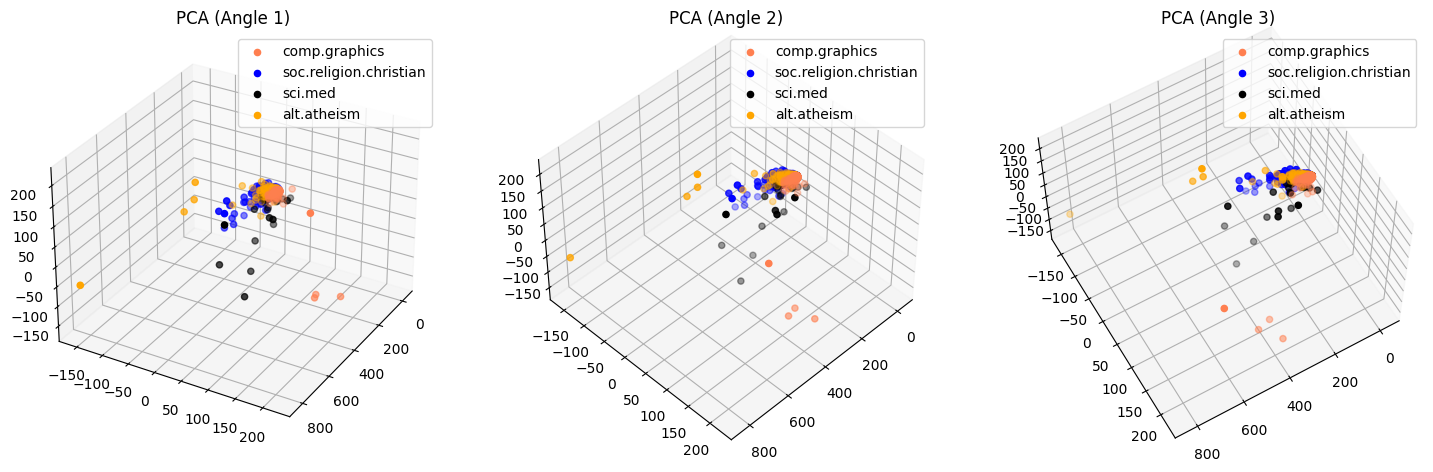

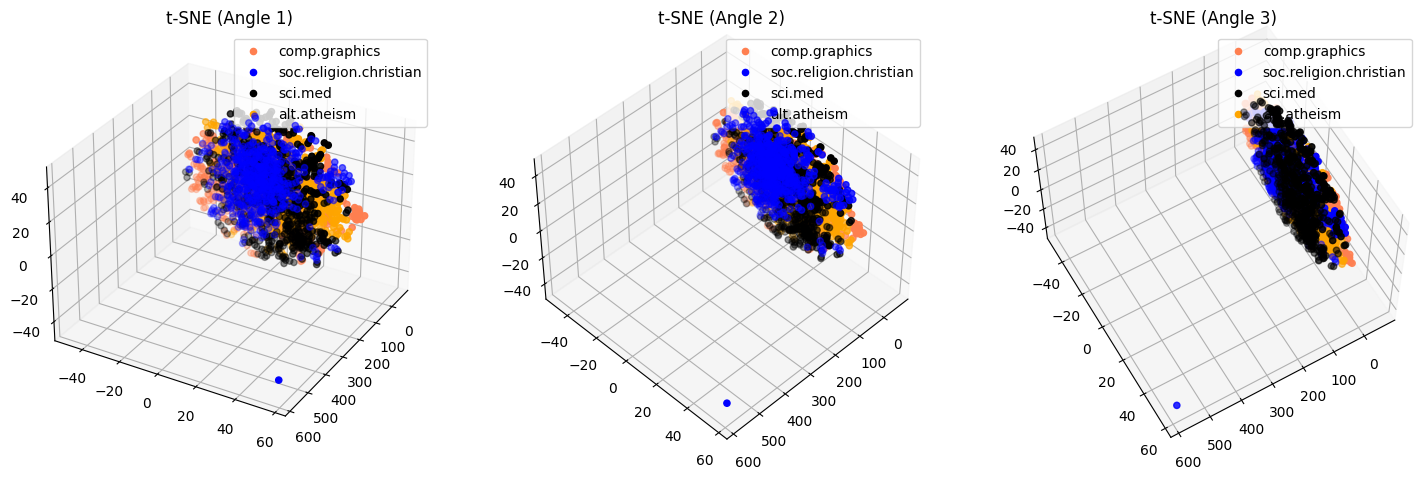

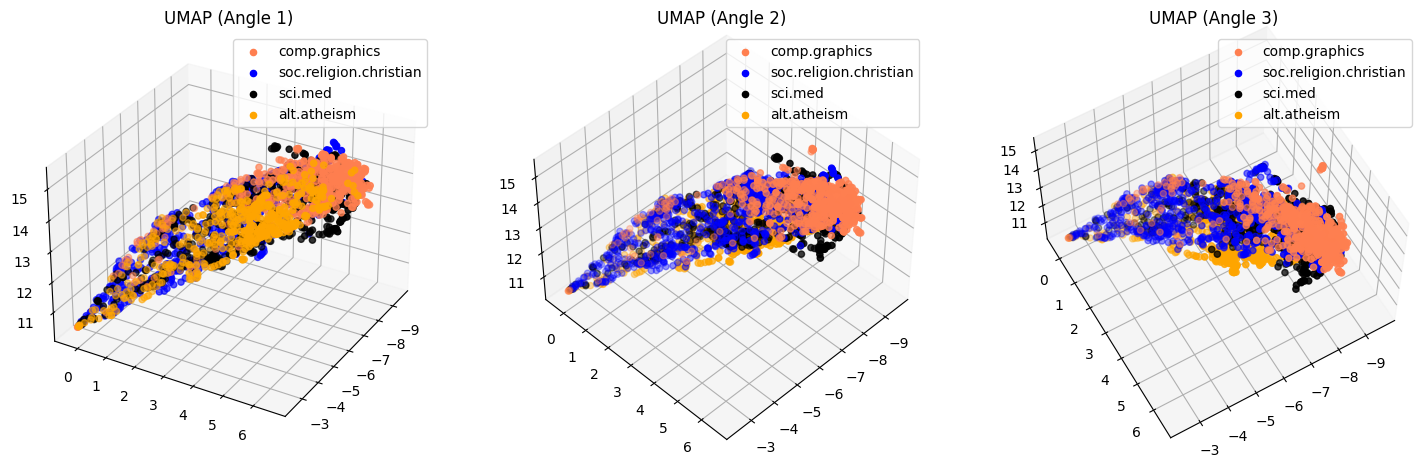

In [147]:
# Answer here
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce the dimensions to 3 components
X_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Categories and colors
categories = X['category_name'].unique()
col = ['coral', 'blue', 'black', 'orange']

# Function to create 3D scatter plots
def plot_3d(X_reduced, title, angle1, angle2, angle3):
    fig = plt.figure(figsize=(18, 6))

    # Plot 1
    ax = fig.add_subplot(131, projection='3d')
    ax.set_title(title + ' (Angle 1)')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, label=category)
    ax.view_init(elev=angle1[0], azim=angle1[1])
    ax.legend(loc='upper right')

    # Plot 2
    ax = fig.add_subplot(132, projection='3d')
    ax.set_title(title + ' (Angle 2)')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, label=category)
    ax.view_init(elev=angle2[0], azim=angle2[1])
    ax.legend(loc='upper right')

    # Plot 3
    ax = fig.add_subplot(133, projection='3d')
    ax.set_title(title + ' (Angle 3)')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, label=category)
    ax.view_init(elev=angle3[0], azim=angle3[1])
    ax.legend(loc='upper right')

    plt.show()

# Define three angles (camera positions) to visualize the data
angle1 = [30, 30]
angle2 = [45, 45]
angle3 = [60, 60]

# Plot PCA, t-SNE, and UMAP with 3D reduction
plot_3d(X_pca_tdm_3d, 'PCA', angle1, angle2, angle3)
plot_3d(X_tsne_tdm_3d, 't-SNE', angle1, angle2, angle3)
plot_3d(X_umap_tdm_3d, 'UMAP', angle1, angle2, angle3)


In [ ]:
#Answer 
#After reducing the data to 3 dimensions and looking at it from different angles, here's what we can clearly see:

#PCA (Principal Component Analysis):

# Even in 3D, the data points from different categories are still quite mixed together. The groups don't really separate clearly, and it looks like most of the data points are overlapping.
#This happens because PCA is designed to capture the overall "spread" or variance in the data. It’s more focused on finding general trends rather than trying to pull apart different groups. That's why even after adding a third dimension, the categories don't seem to separate much. PCA is helpful for simplifying data but may not be the best for seeing distinct categories, especially when those categories are complex or not linearly separable.

#t-SNE (t-Distributed Stochastic Neighbor Embedding):
# The 3D t-SNE plot looks somewhat similar to the 2D version. When we rotate it, we can see slight changes in how the points are placed, but the overall structure remains the same. The clusters of points look like they’ve been rotated or flipped, but the basic layout is quite similar across different views.
#this happens coz t-SNE is great at keeping points that are similar close together, so we still see the same clusters, just from different angles. t-SNE can be a bit sensitive, so even small changes in the data or how it's processed can make it look slightly different. But in this case, adding a third dimension doesn't seem to drastically change the way the data is grouped. It gives us a slightly more detailed view, but the overall relationships between points haven’t changed much.

#UMAP (Uniform Manifold Approximation and Projection):
# UMAP shows the biggest change when we add a third dimension. The points in the 3D UMAP plot form much tighter, more distinct clusters compared to PCA and t-SNE. As we rotate the plot, we can see clear boundaries between different groups. The data looks more neatly organized, with each category having its own distinct space.
#this happen coz  UMAP is especially good at preserving both small-scale details (how close points are to each other) and larger patterns (how groups of points relate to each other). That’s why in 3D, UMAP gives us a more structured and clear separation between categories. It’s better at handling the complexity of the data, making it easier to spot meaningful groups. UMAP also reduces noise, which helps clarify the relationships between points.

#Shortly
#PCA: Even in 3D, PCA struggles to separate the categories. It’s more about capturing the broad patterns in the data and less about dividing distinct groups.
#t-SNE: In 3D, t-SNE doesn’t change much from its 2D version. It keeps local clusters intact, but rotating the plot mainly just gives us a different perspective of the same structure.
#UMAP: UMAP benefits the most from the extra dimension. It gives a much clearer picture of the data, with distinct groups that are easier to see and understand. Rotating the plot lets us appreciate the separation between categories.
#Thus, UMAP is the most effective at separating the categories in 3D, while PCA and t-SNE still show overlapping or mixed clusters. These visualizations help us see the structure of the data, but they don't always capture everything a machine learning model might find. So, while UMAP gives us the clearest view, these plots are just one part of understanding the data.

---

In [148]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [149]:
mlb = preprocessing.LabelBinarizer()

In [150]:
mlb.fit(X.category)

LabelBinarizer()

In [151]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [152]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

                                      tokenized_text  bin_category  
0  {converting, to, this, M.P.Collier@uk.ac.city,...  [0, 1, 0, 0]  
1  {Math, 3d, For, to, area...then, else, this, h...  [0, 1, 0, 0]  
2  {broken,, >reason, to, an, ignored, Darin, it'...  [0, 0, 0, 1]  
3  {Rijksuniversiteit, recent, in, 1989., s061259...  [0, 0, 0, 1]  
4  {NCR, SC, to, "given", this, feast.'..., at, '...  [0, 0, 0, 1]  
5  {whose, here., well., |, objections, human, tr...  [0, 0, 0, 1]  
6  {discourse, accept, are,, strong, forgiven, ju...  [0, 0, 0, 1]  
7  {clearasil., loves, convinced, to, an, till, i...  [0, 0, 1, 0]  
8  {equivalent, Gordon, |, think, just, N3JXP, wh...  [0, 0, 1, 0]

---

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [153]:
# Answer here
from sklearn import preprocessing

# Initialize LabelBinarizer
mlb = preprocessing.LabelBinarizer()

# Fit and transform the 'category_name' column
mlb.fit(X['category_name'])

# Transform the 'category_name' column and add the result to the DataFrame
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

# Check the first few rows to verify the binarization
print(X[['category_name', 'bin_category_name']].head(9))


            category_name bin_category_name
0           comp.graphics      [0, 1, 0, 0]
1           comp.graphics      [0, 1, 0, 0]
2  soc.religion.christian      [0, 0, 0, 1]
3  soc.religion.christian      [0, 0, 0, 1]
4  soc.religion.christian      [0, 0, 0, 1]
5  soc.religion.christian      [0, 0, 0, 1]
6  soc.religion.christian      [0, 0, 0, 1]
7                 sci.med      [0, 0, 1, 0]
8                 sci.med      [0, 0, 1, 0]


In [154]:
# Answer here
#Yes, the binarization will work with the category_name column just like it worked with the category column.
#  The LabelBinarizer is capable of handling both numeric categories (like in category) and string-based categories (like in category_name). 
# When you inspect the output, you should see a similar result to what you saw when binarizing the category column, but now it will reflect the names of the categories instead of the numeric labels.


---

In [155]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [156]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [157]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [158]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


---

In [159]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [160]:
X_train

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
634    0    0     0           0             0     0               0      0   
322    0    0     0           0             0     0               0      0   
1725   0    0     0           0             0     0               0      0   
266    0    0     0           0             0     0               0      0   
1138   0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1638   0    0     0           0             0     0               0      0   
1095   0    0     0           0             0     0               0      0   
1130   0    0     0           0             0     0               0      0   
1294   0    0     0           0             0     0               0      0   
860    0    0     0           0             0     0               0      0   

      000406  0007  ...  zvi  zvonko  zwart  zyeh  zyklon  zyxel  zz  zzz  ªl  \
634        0     0  ...    0       0      0     0       0      0   0    0   0   
322        0     0  ...    0       0      0     0       0      0   0    0   0   
1725       0     0  ...    0       0      0     0       0      0   0    0   0   
266        0     0  ...    0       0      0     0       0      0   0    0   0   
1138       0     0  ...    0       0      0     0       0      0   0    0   0   
...      ...   ...  ...  ...     ...    ...   ...     ...    ...  ..  ...  ..   
1638       0     0  ...    0       0      0     0       0      0   0    0   0   
1095       0     0  ...    0       0      0     0       0      0   0    0   0   
1130       0     0  ...    0       0      0     0       0      0   0    0   0   
1294       0     0  ...    0       0      0     0       0      0   0    0   0   
860        0     0  ...    0       0      0     0       0      0   0    0   0   

      íålittin  
634          0  
322          0  
1725         0  
266          0  
1138         0  
...        ...  
1638         0  
1095         0  
1130         0  
1294         0  
860          0  

[1579 rows x 35788 columns]

In [161]:
X_test

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
561    0    0     0           0             0     0               0      0   
440    0    0     0           0             0     0               0      0   
1513   0    1     0           0             0     0               0      0   
1360   0    0     0           0             0     0               0      0   
259    0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1552   0    0     0           0             0     0               0      0   
331    0    0     0           0             0     0               0      0   
194    0    0     0           0             0     0               0      0   
2122   0    0     0           0             0     0               0      0   
2147   0    0     0           0             0     0               0      0   

      000406  0007  ...  zvi  zvonko  zwart  zyeh  zyklon  zyxel  zz  zzz  ªl  \
561        0     0  ...    0       0      0     0       0      0   0    0   0   
440        0     0  ...    0       0      0     0       0      0   0    0   0   
1513       0     0  ...    0       0      0     0       0      0   0    0   0   
1360       0     0  ...    0       0      0     0       0      0   0    0   0   
259        0     0  ...    0       0      0     0       0      0   0    0   0   
...      ...   ...  ...  ...     ...    ...   ...     ...    ...  ..  ...  ..   
1552       0     0  ...    0       0      0     0       0      0   0    0   0   
331        0     0  ...    0       0      0     0       0      0   0    0   0   
194        0     0  ...    0       0      0     0       0      0   0    0   0   
2122       0     0  ...    0       0      0     0       0      0   0    0   0   
2147       0     0  ...    0       0      0     0       0      0   0    0   0   

      íålittin  
561          0  
440          0  
1513         0  
1360         0  
259          0  
...        ...  
1552         0  
331          0  
194          0  
2122         0  
2147         0  

[678 rows x 35788 columns]

In [162]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9660766961651918

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9535    0.9535    0.9535       129
         comp.graphics     0.9540    0.9822    0.9679       169
               sci.med     0.9839    0.9683    0.9760       189
soc.religion.christian     0.9683    0.9581    0.9632       191

              accuracy                         0.9661       678
             macro avg     0.9649    0.9655    0.9651       678
          weighted avg     0.9663    0.9661    0.9661       678



In [163]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [164]:
X_train

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
634    0    0     0           0             0     0               0      0   
322    0    0     0           0             0     0               0      0   
1725   0    0     0           0             0     0               0      0   
266    0    0     0           0             0     0               0      0   
1138   0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1638   0    0     0           0             0     0               0      0   
1095   0    0     0           0             0     0               0      0   
1130   0    0     0           0             0     0               0      0   
1294   0    0     0           0             0     0               0      0   
860    0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
634        0     0  ...                                   0   
322        0     0  ...                                   0   
1725       0     0  ...                                   0   
266        0     0  ...                                   0   
1138       0     0  ...                                   0   
...      ...   ...  ...                                 ...   
1638       0     0  ...                                   0   
1095       0     0  ...                                   0   
1130       0     0  ...                                   0   
1294       0     0  ...                                   0   
860        0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
634                                  0                       0   
322                                  0                       0   
1725                                 0                       0   
266                                  0                       0   
1138                                 0                       0   
...                                ...                     ...   
1638                                 0                       0   
1095                                 0                       0   
1130                                 0                       0   
1294                                 0                       0   
860                                  0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
634                                 0                                0   
322                                 0                                0   
1725                                0                                0   
266                                 0                                0   
1138                                0                                0   
...                               ...                              ...   
1638                                0                                0   
1095                                0                                0   
1130                                0                                0   
1294                                0                                0   
860                                 0                                0   

      axes funds motss matching  boy funds motss matching  \
634                           0                         0   
322                           0                         0   
1725                          0                         0   
266                           0                         0   
1138                          0                         0   
...                         ...                       ...   
1638                          0                         0   
1095                          0                         0   
1130                          0                         0   
1294                

In [165]:
X_test

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
561    0    0     0           0             0     0               0      0   
440    0    0     0           0             0     0               0      0   
1513   0    1     0           0             0     0               0      0   
1360   0    0     0           0             0     0               0      0   
259    0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1552   0    0     0           0             0     0               0      0   
331    0    0     0           0             0     0               0      0   
194    0    0     0           0             0     0               0      0   
2122   0    0     0           0             0     0               0      0   
2147   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
561        0     0  ...                                   0   
440        0     0  ...                                   0   
1513       0     0  ...                                   0   
1360       0     0  ...                                   0   
259        0     0  ...                                   0   
...      ...   ...  ...                                 ...   
1552       0     0  ...                                   0   
331        0     0  ...                                   0   
194        0     0  ...                                   0   
2122       0     0  ...                                   0   
2147       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
561                                  0                       0   
440                                  0                       0   
1513                                 0                       0   
1360                                 0                       0   
259                                  0                       0   
...                                ...                     ...   
1552                                 0                       0   
331                                  0                       0   
194                                  0                       0   
2122                                 0                       0   
2147                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
561                                 0                                0   
440                                 0                                0   
1513                                0                                0   
1360                                0                                0   
259                                 0                                0   
...                               ...                              ...   
1552                                0                                0   
331                                 0                                0   
194                                 0                                0   
2122                                0                                0   
2147                                0                                0   

      axes funds motss matching  boy funds motss matching  \
561                           0                         0   
440                           0                         0   
1513                          0                         0   
1360                          0                         0   
259                           0                         0   
...                         ...                       ...   
1552                          0                         0   
331                           0                         0   
194                           0                         0   
2122                

In [166]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9734513274336283

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9837    0.9380    0.9603       129
         comp.graphics     0.9940    0.9822    0.9881       169
               sci.med     0.9789    0.9841    0.9815       189
soc.religion.christian     0.9444    0.9791    0.9614       191

              accuracy                         0.9735       678
             macro avg     0.9753    0.9709    0.9728       678
          weighted avg     0.9739    0.9735    0.9735       678



-----

## 8. Concluding Remarks

Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training learning models. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercises and challenge yourself, you are on your way to becoming a super Data Scientist. 

From here the possibilities for you are endless. You now know how to use almost every common technique for preprocessing with state-of-the-art tools, such as Pandas, Scikit-learn, UMAP and PAMI. You are now with the trend! 

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place. 

----

## 9. References

- Pandas cook book ([Recommended for starters](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)